# Imports

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

import sys
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *
from KDEpy import FFTKDE

In [2]:
FIGDIR = '/home/HPC/camontan/turchetti_paper/img/paper_tier/'
DPI = 300
# FORMAT = 'png'
FORMAT = 'pdf'

In [3]:
# set latex rendering for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Setup

In [4]:
OUTDIR = "/home/HPC/camontan/turchetti_paper/output/focused_scan/"

OUTDIR2 = "/home/HPC/camontan/turchetti_paper/output/focused_scan_2/"
OUTDIR3 = "/home/HPC/camontan/turchetti_paper/output/"


"/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5"

'/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5'

In [5]:
TUNES = ["scan_28_31_", "scan_168_201_"]
TUNES_NAMES = ["(0.28, 0.31)", "(0.168, 0.201)"]
EXTENTS = [(0, 0.45, 0, 0.45), (0, 0.6, 0, 0.6)]
EPSILONS = ["epsilon_0d0_", "epsilon_32d0_"]
EPSILONS_NAMES = ["0.0", "32.0"]
MUS = ["mu_0d0_", "mu_0d5_"]
MUS_NAMES = ["0.0", "0.5"]

SAMPLES_PER_SIDE = [300]

In [6]:
import itertools

In [7]:
# create a list of all the products of the above lists
# this will be used to loop over all the different files
# and load the data
all_combinations = list(itertools.product(((t,s) for t, s in zip(TUNES, EXTENTS)),EPSILONS, MUS))
all_combinations = list(itertools.product(TUNES, EPSILONS, MUS))
name_combinations = list(itertools.product(TUNES_NAMES, EPSILONS_NAMES, MUS_NAMES))
samples = SAMPLES_PER_SIDE[0]


In [9]:
all_combinations

[('scan_28_31_', 'epsilon_0d0_', 'mu_0d0_'),
 ('scan_28_31_', 'epsilon_0d0_', 'mu_0d5_'),
 ('scan_28_31_', 'epsilon_32d0_', 'mu_0d0_'),
 ('scan_28_31_', 'epsilon_32d0_', 'mu_0d5_'),
 ('scan_168_201_', 'epsilon_0d0_', 'mu_0d0_'),
 ('scan_168_201_', 'epsilon_0d0_', 'mu_0d5_'),
 ('scan_168_201_', 'epsilon_32d0_', 'mu_0d0_'),
 ('scan_168_201_', 'epsilon_32d0_', 'mu_0d5_')]

In [8]:
def get_hdf5_files(tune, epsilon, mu, samples):
    f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
    f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")
    f_rem = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_rem_rem.h5"), "r")
    f_tune = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_tune_tune.h5"), "r")
    f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")
    f_megno = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_megno_megno.h5"), "r")

    return f_stab, f_lyap, f_rem, f_tune, f_birkhoff, f_megno

In [9]:
f_stab_list = []
f_lyap_list = []
f_rem_list = []
f_tune_list = []
f_birkhoff_list = []
f_megno_list = []

for combo in tqdm(all_combinations):
    tune, epsilon, mu = combo[0], combo[1], combo[2]
    f_stab, f_lyap, f_rem, f_tune, f_birkhoff, f_megno = get_hdf5_files(tune, epsilon, mu, samples)

    f_stab_list.append(f_stab)
    f_lyap_list.append(f_lyap)
    f_rem_list.append(f_rem)
    f_tune_list.append(f_tune)
    f_birkhoff_list.append(f_birkhoff)
    f_megno_list.append(f_megno)

100%|██████████| 8/8 [00:00<00:00, 278.78it/s]


In [10]:
masks_list = []
ground_truth_list = []

In [11]:
lyapunov_scores_list = []
megno_scores_list = []
fli_scores_list = []
lyapunov_b_scores_list = []
fma_birkhoff_scores_list = []
fma_fft_scores_list = []
rem_scores_list = []
gali_scores_list = []

In [12]:
lyapunov_guesses_list = []
megno_guesses_list = []
fli_guesses_list = []
lyapunov_b_guesses_list = []
fma_birkhoff_guesses_list = []
fma_fft_guesses_list = []
rem_guesses_list = []
gali_guesses_list = []

In [13]:
lyapunov_post_data_list = []
megno_post_data_list = []
fli_post_data_list = []
lyapunov_b_post_data_list = []
fma_birkhoff_post_data_list = []
fma_fft_post_data_list = []
rem_post_data_list = []
gali_post_data_list = []

In [14]:
lyapunov_thresholds_list = []
megno_thresholds_list = []
fli_thresholds_list = []
lyapunov_b_thresholds_list = []
fma_birkhoff_thresholds_list = []
fma_fft_thresholds_list = []
rem_thresholds_list = []
gali_thresholds_list = []

In [15]:
rem_best_thresholds_list = []

In [18]:
for f_stab, f_lyap, f_rem, f_tune, f_birkhoff, f_megno in tqdm(list(zip(f_stab_list, f_lyap_list, f_rem_list, f_tune_list, f_birkhoff_list, f_megno_list))):
    ############ GROUND TRUTH ######################################################
    print("Loading ground truth...")

    data = f_stab["stability"][:]
    mask = np.log10(data)==8

    ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
    ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
    ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
    ground_truth_data[~mask] = np.nan
    ground_truth_data = np.log10(ground_truth_data)

    gt_thesh = find_threshold_smart(np.log10(ground_truth_data[mask]), where_chaos="higher")
    ground_truth = np.log10(ground_truth_data) > gt_thesh

    masks_list.append(mask)
    ground_truth_list.append(ground_truth)

    ############ LYAPUNOV ##########################################################
    print("Loading lyapunov...")

    times = []
    lyapunov_data = []

    for key in f_lyap.keys():
        if not key.isdigit():
            continue
        times.append(int(key))
        lyapunov_data.append(f_lyap[key]['lyapunov_error'][:])

    # sort times and lyapunov data
    times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

    # convert to numpy arrays
    times = np.array(times)
    lyapunov_data = np.array(lyapunov_data)

    lyapunov_thresholds = []
    lyapunov_post_data = []
    lyapunov_guesses = []
    lyapunov_scores = []
    for t, data in zip(times, lyapunov_data):
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data = np.log10(data)
        data = np.log10(data)
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
        lyapunov_post_data.append(data)
        lyapunov_thresholds.append(find_threshold_smart(data[mask], where_chaos="higher"))
        guess = (data > lyapunov_thresholds[-1])
        lyapunov_guesses.append(guess)
        lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

    lyapunov_scores_list.append(lyapunov_scores)
    lyapunov_guesses_list.append(lyapunov_guesses)
    lyapunov_post_data_list.append(lyapunov_post_data)
    lyapunov_thresholds_list.append(lyapunov_thresholds)

    ############ MEGNO #############################################################
    print("Loading megno...")

    times = []
    megno_data = []

    for key in f_megno.keys():
        if not key.isdigit():
            continue
        times.append(int(key))
        megno_data.append(f_megno[key]['megno'][:])

    # sort times and megno data
    times, megno_data = zip(*sorted(zip(times, megno_data)))

    # convert to numpy arrays
    times = np.array(times)
    megno_data = np.array(megno_data)

    megno_thresholds = []
    megno_post_data = []
    megno_guesses = []
    megno_scores = []
    for t, data in zip(times, megno_data):
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data = np.log10(data)
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
        megno_post_data.append(data)
        megno_thresholds.append(find_threshold_smart(data[mask], where_chaos="higher"))
        guess = (data > megno_thresholds[-1])
        megno_guesses.append(guess)
        megno_scores.append(classify_data(ground_truth[mask], guess[mask]))

    megno_scores_list.append(megno_scores)
    megno_guesses_list.append(megno_guesses)
    megno_post_data_list.append(megno_post_data)
    megno_thresholds_list.append(megno_thresholds)

    ############ FLI ###############################################################
    print("Loading fli...")

    times = []
    fli_x_data = []

    for key in f_lyap.keys():
        if not key.isdigit():
            continue
        times.append(int(key))
        fli_x_data.append(f_lyap[key]['fli_base_x'][:])

    # sort times and lyapunov data
    times, fli_x_data = zip(*sorted(zip(times, fli_x_data)))

    # convert to numpy arrays
    times = np.array(times)
    fli_x_data = np.array(fli_x_data)

    fli_x_thresholds = []
    fli_x_post_data = []
    fli_x_guesses = []
    fli_x_scores = []
    for t, data in zip(times, fli_x_data):
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        # data = np.log10(data)
        data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
        fli_x_post_data.append(data)

        fli_x_thresholds.append(find_threshold_smart(data[mask], where_chaos="higher"))
        guess = (data > fli_x_thresholds[-1])
        fli_x_guesses.append(guess)
        fli_x_scores.append(classify_data(ground_truth[mask], guess[mask]))

    fli_scores_list.append(fli_x_scores)
    fli_guesses_list.append(fli_x_guesses)
    fli_post_data_list.append(fli_x_post_data)
    fli_thresholds_list.append(fli_x_thresholds)

    ############ GALI ##############################################################
    print("Loading gali...")

    times = []
    gali_data = []

    for key in f_lyap.keys():
        if not key.isdigit():
            continue
        times.append(int(key))
        gali_data.append(f_lyap[key]['gali'][:])

    # sort times and lyapunov data
    times, gali_data = zip(*sorted(zip(times, gali_data)))

    # convert to numpy arrays
    times = np.array(times)
    gali_data = np.array(gali_data)

    gali_thresholds = []
    gali_post_data = []
    gali_guesses = []
    gali_scores = []
    for t, data in zip(times, gali_data):
        data[mask & (np.isnan(data))] = np.nanmin(data[mask])
        data = np.log10(data)
        data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
        data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
        gali_post_data.append(data)

        gali_thresholds.append(find_threshold_smart(data[mask], where_chaos="gali"))
        guess = (data < gali_thresholds[-1])
        gali_guesses.append(guess)
        gali_scores.append(classify_data(ground_truth[mask], guess[mask]))

    gali_scores_list.append(gali_scores)
    gali_guesses_list.append(gali_guesses)
    gali_post_data_list.append(gali_post_data)
    gali_thresholds_list.append(gali_thresholds)

    ############# FMA ##############################################################
    print("Loading fma...")

    times_fma = []
    fma_fft_data = []
    fma_birkhoff_data = []

    for key in f_tune['0'].keys():
        if not key.isdigit():
            continue
        if not (key in f_tune):
            continue
        times_fma.append(int(key) * 2)
        
        fma_fft_data.append(np.sqrt(
            (f_tune['0'][key]['tune_x_fft'][:] - f_tune[key][str(int(key)*2)]['tune_x_fft'][:])**2 +
            (f_tune['0'][key]['tune_y_fft'][:] - f_tune[key][str(int(key)*2)]['tune_y_fft'][:])**2
        ))
        fma_birkhoff_data.append(np.sqrt(
            (f_tune['0'][key]['tune_x_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_x_birkhoff'][:])**2 +
            (f_tune['0'][key]['tune_y_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_y_birkhoff'][:])**2
        ))

    # sort times_fma and lyapunov data
    times_fma, fma_fft_data, fma_birkhoff_data = zip(*sorted(zip(times_fma, fma_fft_data, fma_birkhoff_data), key=lambda x: x[0]))

    # convert to numpy arrays
    times_fma = np.array(times_fma)
    fma_fft_data = np.array(fma_fft_data)
    fma_birkhoff_data = np.array(fma_birkhoff_data)

    fma_fft_thresholds = []
    fma_fft_post_data = []
    fma_fft_guesses = []
    fma_fft_scores = []
    for t, data in zip(times_fma, fma_fft_data):
        data[mask & (np.isnan(data))] = np.nanmin(data[mask])
        data = np.log10(data)
        data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
        data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
        data[~mask] = np.nan

        fma_fft_post_data.append(data)

        fma_fft_thresholds.append(find_threshold_smart_v2(data[mask], where_chaos="higher"))
        guess = (data > fma_fft_thresholds[-1])
        fma_fft_guesses.append(guess)
        fma_fft_scores.append(classify_data(ground_truth[mask], guess[mask]))

    fma_birkhoff_thresholds = []
    fma_birkhoff_post_data = []
    fma_birkhoff_guesses = []
    fma_birkhoff_scores = []
    for t, data in zip(times_fma, fma_birkhoff_data):
        data[mask & (np.isnan(data))] = np.nanmin(data[mask])
        data = np.log10(data)
        data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
        data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
        data[~mask] = np.nan

        fma_birkhoff_post_data.append(data)

        fma_birkhoff_thresholds.append(find_threshold_smart_v2(data[mask], where_chaos="higher"))
        guess = (data > fma_birkhoff_thresholds[-1])
        fma_birkhoff_guesses.append(guess)
        fma_birkhoff_scores.append(classify_data(ground_truth[mask], guess[mask]))

    fma_fft_scores_list.append(fma_fft_scores)
    fma_fft_guesses_list.append(fma_fft_guesses)
    fma_fft_post_data_list.append(fma_fft_post_data)
    fma_fft_thresholds_list.append(fma_fft_thresholds)
    fma_birkhoff_scores_list.append(fma_birkhoff_scores)
    fma_birkhoff_guesses_list.append(fma_birkhoff_guesses)
    fma_birkhoff_post_data_list.append(fma_birkhoff_post_data)
    fma_birkhoff_thresholds_list.append(fma_birkhoff_thresholds)

    ########### BIRKHOF ############################################################
    print("Loading birkhoff...")

    times = []
    lyapunov_b_data = []

    for key in f_birkhoff.keys():
        if not key.isdigit():
            continue
        times.append(int(key))
        lyapunov_b_data.append(f_birkhoff[key]['lyapunov_b_x'][:])

    # sort times and lyapunov_b data
    times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

    # convert to numpy arrays
    times = np.array(times)
    lyapunov_b_data = np.array(lyapunov_b_data)

    lyapunov_b_thresholds = []
    lyapunov_b_post_data = []
    lyapunov_b_guesses = []
    lyapunov_b_scores = []
    for t, data in zip(times, lyapunov_b_data):
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data = np.log10(data)
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
        data[~mask] = np.nan
        lyapunov_b_post_data.append(data)
        lyapunov_b_thresholds.append(find_threshold_smart(data[mask], where_chaos="higher"))
        guess = (data > lyapunov_b_thresholds[-1])
        lyapunov_b_guesses.append(guess)
        lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

    lyapunov_b_scores_list.append(lyapunov_b_scores)
    lyapunov_b_guesses_list.append(lyapunov_b_guesses)
    lyapunov_b_post_data_list.append(lyapunov_b_post_data)
    lyapunov_b_thresholds_list.append(lyapunov_b_thresholds)

    ########### REM ################################################################
    print("Loading rem...")

    times = []
    rem_data = []

    for key in f_rem.keys():
        if key == '0':
            continue
        # if key is not the string of an integer, skip
        if not key.isdigit():
            continue 
        times.append(int(key))
        rem_data.append(
            np.sqrt(
                (f_rem['0']['x'][:] - f_rem[key]['x'][:])**2+
                (f_rem['0']['px'][:] - f_rem[key]['px'][:])**2+
                (f_rem['0']['y'][:] - f_rem[key]['y'][:])**2+
                (f_rem['0']['py'][:] - f_rem[key]['py'][:])**2
            )
        )

    # sort times and rem data
    times, rem_data = zip(*sorted(zip(times, rem_data)))

    # convert to numpy arrays
    times = np.array(times)
    rem_data = np.array(rem_data)

    rem_thresholds = []
    rem_best_thresholds = []
    rem_post_data = []
    rem_guesses = []
    rem_scores = []
    for t, data in zip(times, rem_data):
        data = np.log10(data)
        data[mask & (np.isnan(data))] = np.nanmax(data[mask])
        data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
        data[~mask] = np.nan
        rem_post_data.append(data)
        rem_thresholds.append(find_threshold_smart(data[mask], where_chaos="higher"))
        rem_best_thresholds.append(find_best_threshold(ground_truth[mask], data[mask]))
        guess = (data > rem_thresholds[-1])
        rem_guesses.append(guess)
        rem_scores.append(classify_data(ground_truth[mask], guess[mask]))

    rem_scores_list.append(rem_scores)
    rem_guesses_list.append(rem_guesses)
    rem_post_data_list.append(rem_post_data)
    rem_thresholds_list.append(rem_thresholds)
    rem_best_thresholds_list.append(rem_best_thresholds)

  0%|          | 0/8 [00:00<?, ?it/s]

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning:

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/

What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

Loading ground truth...
Loading lyapunov...
Loading megno...


/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:85: RuntimeWarning: invalid value encountered in log10
  data 

Loading fli...
Loading gali...


/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:163: RuntimeWarning: divide by zero encountere

Loading fma...


/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the actual fuck?
What the a

/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:215: RuntimeWarning: divide by zero encountere

Loading birkhoff...


/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9126/2107939923.py:279: RuntimeWarning: invalid value encountered in log1

Loading rem...


/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:234: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)
/tmp/ipykernel_9126/2107939923.py:329: RuntimeWarning: divide by zero encountered in log10
  data = np.log

In [ ]:
import pickle

# pickle all the processed data
with open("processed.pkl", "wb") as f:
    pickle.dump((
        all_combinations,
        lyapunov_scores_list,
        megno_scores_list,
        fli_scores_list,
        lyapunov_b_scores_list,
        fma_birkhoff_scores_list,
        fma_fft_scores_list,
        rem_scores_list,
        gali_scores_list,
    ),f)

In [19]:
# load back the data
import pickle
with open("processed.pkl", "rb") as f:
    (
        all_combinations,
        lyapunov_scores_list,
        megno_scores_list,
        fli_scores_list,
        lyapunov_b_scores_list,
        fma_birkhoff_scores_list,
        fma_fft_scores_list,
        rem_scores_list,
        gali_scores_list,
    ) = pickle.load(f)

In [22]:

times = []

for key in f_lyap_list[0].keys():
    if key.sdigit():
        times.append(int(key))

# convert to numpy arrays
times = np.array(times)

ValueError: invalid literal for int() with base 10: 'initial'

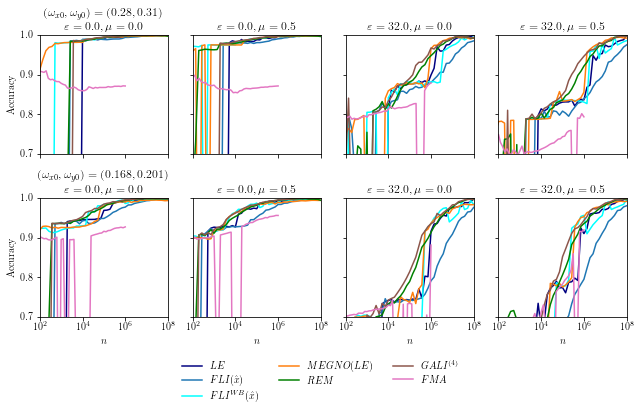

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(9, 5), sharey=True, sharex=True)

axs_listed = [ax for ax in axs.ravel()]

for i, ax in enumerate(axs_listed):
    ax.plot(times, [s["accuracy"] for s in lyapunov_scores_list[i]], label="$LE$", color="navy")
    ax.plot(times, [s["accuracy"] for s in fli_scores_list[i]], label="$FLI(\\hat{{x}})$", color="C0")
    ax.plot(times, [s["accuracy"] for s in lyapunov_b_scores_list[i]], label="$FLI^{{WB}}(\\hat{{x}})$", color="cyan")
    ax.plot(times, [s["accuracy"] for s in megno_scores_list[i]], label="$MEGNO(LE)$", color="C1")
    ax.plot(times, [s["accuracy"] for s in rem_scores_list[i]], label="$REM$", color="green")
    ax.plot(times, [s["accuracy"] for s in gali_scores_list[i]], label="$GALI^{{(4)}}$", color="C5")
    ax.plot(times_fma, [s["accuracy"] for s in fma_birkhoff_scores_list[i]], label="$FMA$", color="C6")

    ax.set_xscale("log")
    ax.set_xlim(1e2, 1e8)
    ax.set_ylim(0.7, 1.0)

    if i == 0 or i == 4:
        ax.set_ylabel("Accuracy")
        title_string = f"$(\\omega_{{x0}}, \\omega_{{y0}})={name_combinations[i][0]}$\n"
    else:
        title_string = ""

    if i >= 4:
        ax.set_xlabel("$n$")
        # # rotate xticks
        # for tick in ax.get_xticklabels():
        #     tick.set_rotation(45)

    title_string += f"$\\varepsilon = {name_combinations[i][1]}, \\mu = {name_combinations[i][2]}$"

    ax.set_title(title_string)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

# add common legend to the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 0.01), ncol=3, frameon=False, loc="upper center")
plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, f"performance.{FORMAT}"), bbox_inches="tight", dpi=DPI)


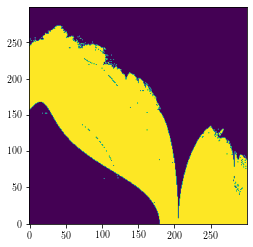

In [ ]:
plt.imshow(rem_guesses_list[0][-1].reshape(300,300), origin="lower")

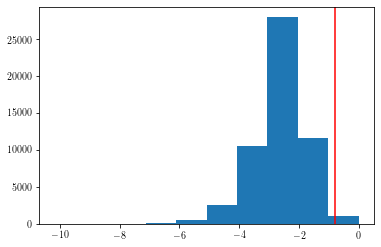

In [19]:
plt.hist(rem_post_data_list[0][-1], bins=10)
plt.axvline(rem_thresholds_list[0][-1], color="red")

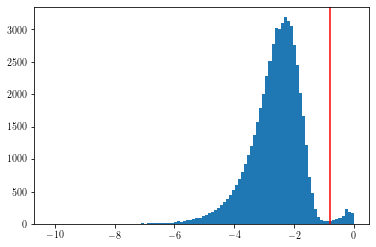

In [20]:
plt.hist(rem_post_data_list[0][-1], bins=100)
plt.axvline(rem_thresholds_list[0][-1], color="red")

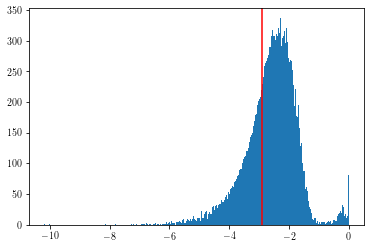

In [ ]:
plt.hist(rem_post_data_list[0][-1], bins=1000)
plt.axvline(rem_thresholds_list[0][-1], color="red")

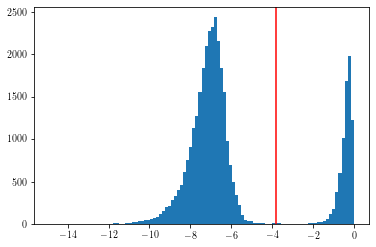

In [ ]:
plt.hist(rem_post_data_list[2][-1], bins=100)
plt.axvline(rem_thresholds_list[2][-1], color="red")

IndexError: list index out of range

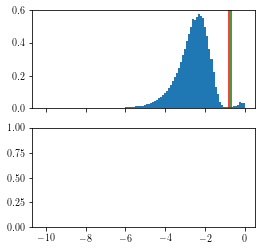

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4), sharex=True)

axs[0].hist(rem_post_data_list[0][-1], bins=100, density=True, label="Samples")
axs[0].axvline(rem_thresholds_list[0][-1], color="red", label="K-means threshold")
axs[0].axvline(rem_best_thresholds_list[0][-1], color="green", label="Best threshold")

axs[1].hist(rem_post_data_list[2][-1], bins=100, density=True)
axs[1].axvline(rem_thresholds_list[2][-1], color="red")
axs[1].axvline(rem_best_thresholds_list[2][-1], color="green")

axs[1].set_xlabel("$\\log_{{10}}(REM)$")

axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Frequency")

axs[0].set_title(f"$(\\omega_{{x0}}, \\omega_{{y0}})={name_combinations[0][0]}, \\varepsilon = {name_combinations[0][1]}, \\mu = {name_combinations[0][2]}$")
axs[1].set_title(f"$(\\omega_{{x0}}, \\omega_{{y0}})={name_combinations[2][0]}, \\varepsilon = {name_combinations[2][1]}, \\mu = {name_combinations[2][2]}$")

axs[1].set_xlim(left=-12)

plt.tight_layout()

# add common legend to the top
fig.legend(*axs[0].get_legend_handles_labels(), loc="center", ncol=3, bbox_to_anchor=(0.5, 1.00), frameon=False, fontsize="small")

# n_samples_0 = rem_post_data_list[0][-1][np.]

# # add text inside the two histograms to show infos
# axs[0].text(0.01, 0.95,f"Samples: {np.count_nonzero()}",
#             transform=axs[0].transAxes, va="top", ha="left", fontsize="small")
# axs[1].text(0.01, 0.95, f"Samples: {np.count_nonzero(rem_post_data_list[0][-1])}",
#             transform=axs[1].transAxes, va="top", ha="left", fontsize="small")



In [20]:
import pickle

masks_list = []
ground_truth_list = []
ground_truth_mask_list = []

initial_x_list = []
initial_y_list = []
initial_px_list = []
initial_py_list = []

lyapunov_scores_list = []
megno_scores_list = []
fli_scores_list = []
lyapunov_b_scores_list = []
lyapunov_nob_scores_list = []
fma_birkhoff_scores_list = []
fma_fft_scores_list = []
rem_scores_list = []
gali_scores_list = []

lyapunov_guesses_list = []
megno_guesses_list = []
fli_guesses_list = []
lyapunov_b_guesses_list = []
lyapunov_nob_guesses_list = []
fma_birkhoff_guesses_list = []
fma_fft_guesses_list = []
rem_guesses_list = []
gali_guesses_list = []

lyapunov_post_data_list = []
megno_post_data_list = []
fli_post_data_list = []
lyapunov_b_post_data_list = []
lyapunov_nob_post_data_list = []
fma_birkhoff_post_data_list = []
fma_fft_post_data_list = []
rem_post_data_list = []
gali_post_data_list = []

lyapunov_thresholds_list = []
megno_thresholds_list = []
fli_thresholds_list = []
lyapunov_b_thresholds_list = []
lyapunov_nob_thresholds_list = []
fma_birkhoff_thresholds_list = []
fma_fft_thresholds_list = []
rem_thresholds_list = []
gali_thresholds_list = []

rem_best_thresholds_list = []

for i in range(8):
    with open(f"/home/HPC/camontan/turchetti_paper/classification_tasks/{i}_processed.pkl", "rb") as f:
        data_dict = pickle.load(f)
        masks_list.append(data_dict["mask"])
        ground_truth_list.append(data_dict["ground_truth_data"])
        ground_truth_mask_list.append(data_dict["ground_truth"])

        initial_x_list.append(data_dict["initial_x"])
        initial_y_list.append(data_dict["initial_y"])
        initial_px_list.append(data_dict["initial_px"])
        initial_py_list.append(data_dict["initial_py"])

        lyapunov_scores_list.append(data_dict["lyapunov_scores"])
        megno_scores_list.append(data_dict["megno_scores"])
        fli_scores_list.append(data_dict["fli_x_scores"])
        lyapunov_b_scores_list.append(data_dict["lyapunov_b_scores"])
        lyapunov_nob_scores_list.append(data_dict["lyapunov_nob_scores"])
        fma_birkhoff_scores_list.append(data_dict["fma_birkhoff_scores"])
        rem_scores_list.append(data_dict["rem_scores"])
        gali_scores_list.append(data_dict["gali_scores"])

        lyapunov_thresholds_list.append(data_dict["lyapunov_thresholds"])
        megno_thresholds_list.append(data_dict["megno_thresholds"])
        fli_thresholds_list.append(data_dict["fli_x_thresholds"])
        lyapunov_b_thresholds_list.append(data_dict["lyapunov_b_thresholds"])
        lyapunov_nob_thresholds_list.append(data_dict["lyapunov_nob_thresholds"])
        fma_birkhoff_thresholds_list.append(data_dict["fma_birkhoff_thresholds"])
        rem_thresholds_list.append(data_dict["rem_thresholds"])
        rem_best_thresholds_list.append(data_dict["rem_best_thresholds"])
        gali_thresholds_list.append(data_dict["gali_thresholds"])

        lyapunov_post_data_list.append(data_dict["lyapunov_post_data"])
        megno_post_data_list.append(data_dict["megno_post_data"])
        fli_post_data_list.append(data_dict["fli_x_post_data"])
        lyapunov_b_post_data_list.append(data_dict["lyapunov_b_post_data"])
        lyapunov_nob_post_data_list.append(data_dict["lyapunov_nob_post_data"])
        fma_birkhoff_post_data_list.append(data_dict["fma_birkhoff_post_data"])
        rem_post_data_list.append(data_dict["rem_post_data"])
        gali_post_data_list.append(data_dict["gali_post_data"])

        times = data_dict["times"]
        times_fma = data_dict["times_fma"]

In [21]:
henon_names = [
    "$(\\omega_x, \\omega_y) = (0.168, 0.201); \\varepsilon = 0.0; \\mu = 0.0 $",
    "$(\\omega_x, \\omega_y) = (0.168, 0.201); \\varepsilon = 32.0; \\mu = 0.5 $",
    "$(\\omega_x, \\omega_y) = (0.168, 0.201); \\varepsilon = 0.0; \\mu = 0.0 $",
    "$(\\omega_x, \\omega_y) = (0.168, 0.201); \\varepsilon = 32.0; \\mu = 0.5 $",
    "$(\\omega_x, \\omega_y) = (0.28, 0.31); \\varepsilon = 0.0; \\mu = 0.0 $",
    "$(\\omega_x, \\omega_y) = (0.28, 0.31); \\varepsilon = 32.0; \\mu = 0.5 $",
    "$(\\omega_x, \\omega_y) = (0.28, 0.31); \\varepsilon = 0.0; \\mu = 0.0 $",
    "$(\\omega_x, \\omega_y) = (0.28, 0.31); \\varepsilon = 32.0; \\mu = 0.5 $",
]

In [15]:
def cartesian_to_polar(x, px):
    r = np.sqrt(x**2 + px**2)
    theta = np.arctan2(px, x)
    return r, theta

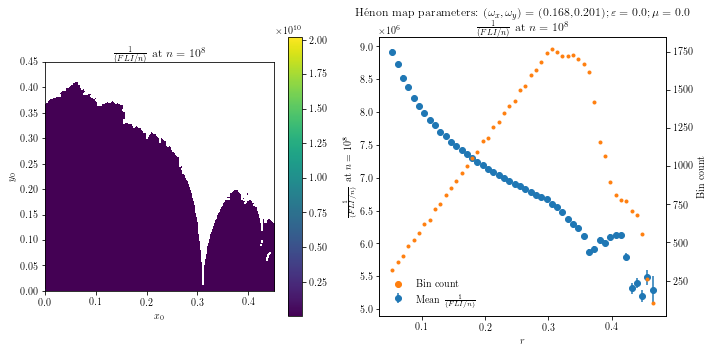

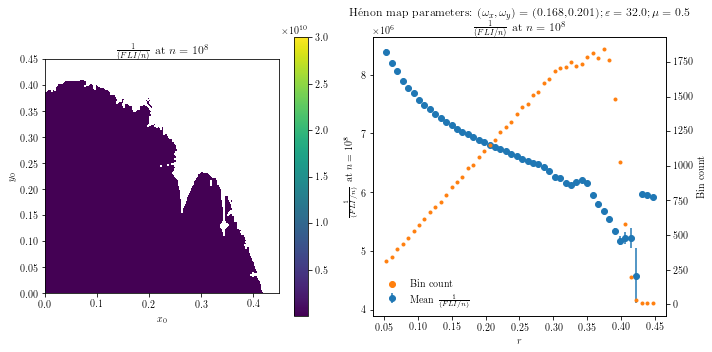

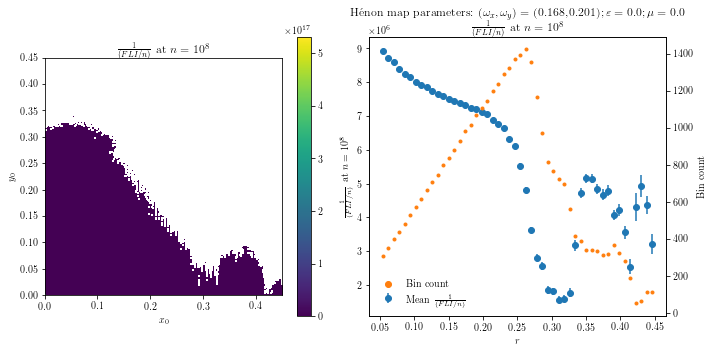

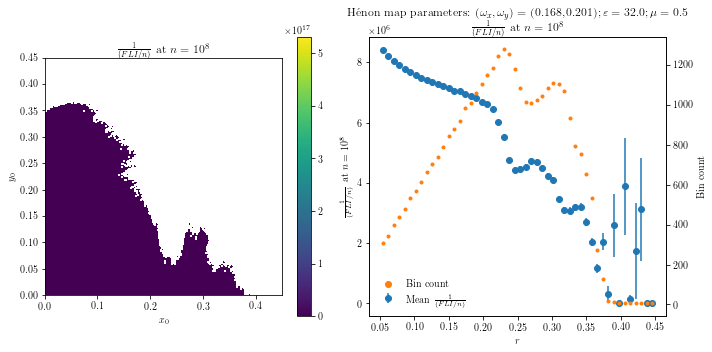

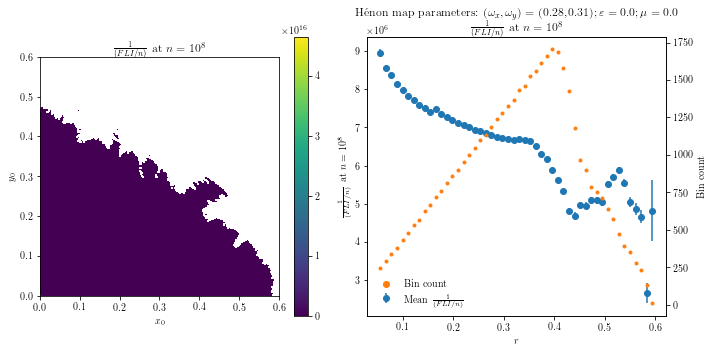

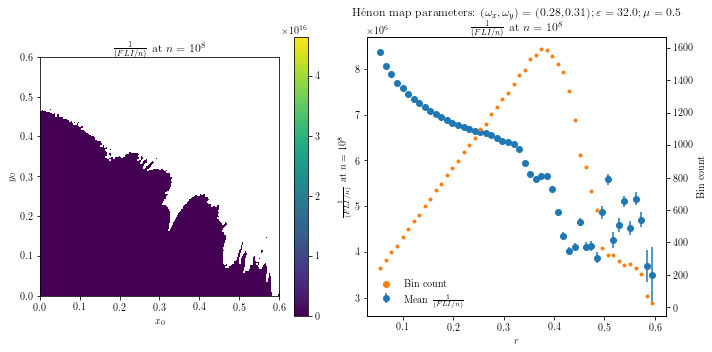

In [53]:
for idx in range(6):

    mask = masks_list[idx]
    ground_truth = ground_truth_list[idx]
    ground_truth_mask = ground_truth_mask_list[idx]
    lyapunov_data = lyapunov_nob_post_data_list[idx][-1]
    lyapunov_data = 10**lyapunov_data
    lyapunov_data = 1 / lyapunov_data

    initial_x = initial_x_list[idx]
    initial_y = initial_y_list[idx]

    r, theta = cartesian_to_polar(initial_x, initial_y)

    r[~mask] = np.nan
    theta[~mask] = np.nan

    # plt.figure()
    # plt.imshow(r.reshape(300, 300), origin="lower", cmap="viridis")
    # plt.colorbar()
    # plt.figure()
    # plt.imshow(theta.reshape(300, 300), origin="lower", cmap="viridis")
    # plt.colorbar()
    # plt.figure()
    # plt.imshow(lyapunov_data.reshape(300, 300), origin="lower", cmap="viridis")
    # plt.colorbar()

    # plt.figure()
    # plt.scatter(r, lyapunov_data)

    min_r = np.nanmin(r)
    min_r = 0.05
    max_r = np.nanmax(r)

    n_bins = 50
    bin_edges = np.linspace(min_r, max_r, n_bins + 1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    bin_means = np.zeros(n_bins)
    bin_std = np.zeros(n_bins)
    bin_counts = np.zeros(n_bins)

    for i in range(n_bins):
        bin_mask = (r >= bin_edges[i]) & (r < bin_edges[i + 1])
        bin_means[i] = np.nanmean(lyapunov_data[bin_mask])
        bin_std[i] = np.nanstd(lyapunov_data[bin_mask])
        bin_counts[i] = np.sum(bin_mask)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    cbar = axs[0].imshow(lyapunov_data.reshape(300, 300), origin="lower", cmap="viridis", extent=EXTENTS[0] if idx < 4 else EXTENTS[1])
    axs[0].set_title("$\\frac{1}{(FLI/n)}$ at $n = 10^8$")
    axs[0].set_xlabel("$x_0$")
    axs[0].set_ylabel("$y_0$")
    fig.colorbar(cbar, ax=axs[0])

    axs[1].errorbar(bin_centers, bin_means, yerr=bin_std / np.sqrt(bin_counts), fmt="o", label="Mean $\\frac{1}{(FLI/n)}$")
    axs[1].scatter([], [], c="C1", label="Bin count")
    axs[1].legend(frameon=False, loc="lower left")
    axs[1].set_xlabel("$r$")
    axs[1].set_ylabel("$\\frac{1}{(FLI/n)}$ at $n = 10^8$")
    axs[1].set_title("Hénon map parameters: " + henon_names[idx] + "\n$\\frac{1}{(FLI/n)}$ at $n = 10^8$")
    axs_bis = axs[1].twinx()
    axs_bis.plot(bin_centers, bin_counts, "o", c="C1", markersize=3)    
    axs_bis.set_ylabel("Bin count")
    plt.tight_layout()
    plt.savefig(f"/home/HPC/camontan/turchetti_paper/img/quick_plot_{idx}.png", dpi=300)

    # plt.figure()
    # plt.hist(r, weights=lyapunov_data)
    # plt.figure()
    # plt.scatter(r, ground_truth_mask)

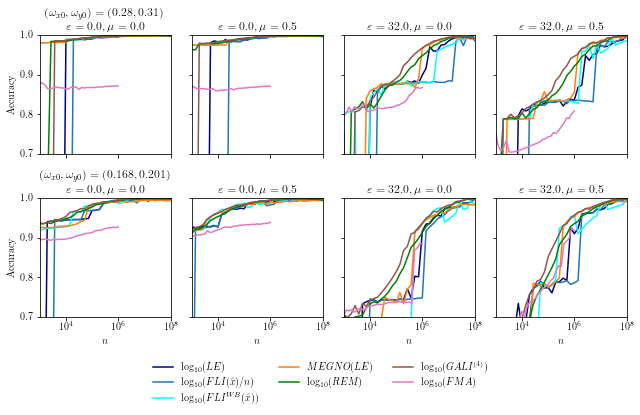

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(9, 5), sharey=True, sharex=True)

axs_listed = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3]
]

for i, ax in enumerate(axs_listed):
    ax.plot(times, [s["accuracy"] for s in lyapunov_scores_list[i]], label="$\\log_{{10}}(LE)$", color="navy")
    ax.plot(times, [s["accuracy"] for s in lyapunov_nob_scores_list[i]], label="$\\log_{{10}}(FLI(\\hat{{x}})/n)$", color="C0")
    ax.plot(times, [s["accuracy"] for s in lyapunov_b_scores_list[i]], label="$\\log_{{10}}(FLI^{{WB}}(\\hat{{x}}))$", color="cyan")
    ax.plot(times, [s["accuracy"] for s in megno_scores_list[i]], label="$MEGNO(LE)$", color="C1")
    ax.plot(times, [s["accuracy"] for s in rem_scores_list[i]], label="$\\log_{{10}}(REM)$", color="green")
    ax.plot(times, [s["accuracy"] for s in gali_scores_list[i]], label="$\\log_{{10}}(GALI^{{(4)}})$", color="C5")
    ax.plot(times_fma, [s["accuracy"] for s in fma_birkhoff_scores_list[i]], label="$\\log_{{10}}(FMA)$", color="C6")

    ax.set_xscale("log")
    ax.set_xlim(1e3, 1e8)
    ax.set_ylim(0.7, 1.0)

    if i == 0 or i == 4:
        ax.set_ylabel("Accuracy")
        title_string = f"$(\\omega_{{x0}}, \\omega_{{y0}})={name_combinations[i][0]}$\n"
    else:
        title_string = ""

    if i >= 4:
        ax.set_xlabel("$n$")
        # # rotate xticks
        # for tick in ax.get_xticklabels():
        #     tick.set_rotation(45)

    title_string += f"$\\varepsilon = {name_combinations[i][1]}, \\mu = {name_combinations[i][2]}$"

    ax.set_title(title_string)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 0.01), ncol=4, frameon=False, loc="upper center")
plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, f"performance.{FORMAT}"), bbox_inches="tight", dpi=DPI)


In [26]:
times[14]

1000

In [27]:
times_fma[20]

1000

In [28]:
import scipy.integrate

integral_score_lyapunov = []
integral_score_lyapunov_nob = []
integral_score_lyapunov_b = []
integral_score_megno = []
integral_score_rem = []
integral_score_gali = []
integral_score_fma_birkhoff = []

for i in range(6):
    integral_score_lyapunov.append(scipy.integrate.trapz([s["accuracy"] for s in lyapunov_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_lyapunov_nob.append(scipy.integrate.trapz([s["accuracy"] for s in lyapunov_nob_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_lyapunov_b.append(scipy.integrate.trapz([s["accuracy"] for s in lyapunov_b_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_megno.append(scipy.integrate.trapz([s["accuracy"] for s in megno_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_rem.append(scipy.integrate.trapz([s["accuracy"] for s in rem_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_gali.append(scipy.integrate.trapz([s["accuracy"] for s in gali_scores_list[i]][14:], np.log10(times)[14:]))
    integral_score_fma_birkhoff.append(scipy.integrate.trapz([s["accuracy"] for s in fma_birkhoff_scores_list[i]][20:], np.log10(times_fma)[20:]))

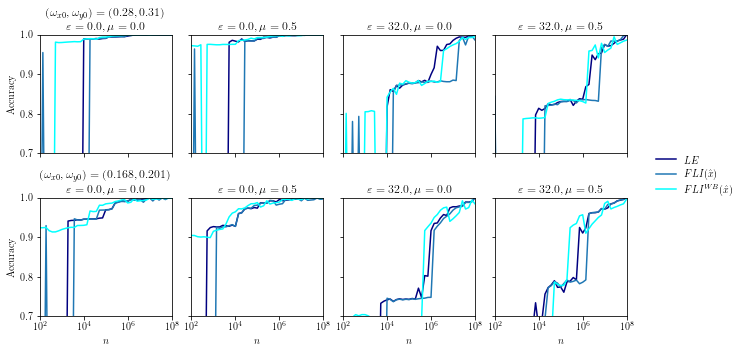

In [94]:
fig, axs = plt.subplots(2, 4, figsize=(9, 5), sharey=True, sharex=True)

axs_listed = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3]
]

for i, ax in enumerate(axs_listed):
    ax.plot(times, [s["accuracy"] for s in lyapunov_scores_list[i]], label="$LE$", color="navy")
    ax.plot(times, [s["accuracy"] for s in lyapunov_nob_scores_list[i]], label="$FLI(\\hat{{x}})$", color="C0")
    ax.plot(times, [s["accuracy"] for s in lyapunov_b_scores_list[i]], label="$FLI^{{WB}}(\\hat{{x}})$", color="cyan")
    # ax.plot(times, [s["accuracy"] for s in megno_scores_list[i]], label="$MEGNO(LE)$", color="C1")
    # ax.plot(times, [s["accuracy"] for s in rem_scores_list[i]], label="$REM$", color="green")
    # ax.plot(times, [s["accuracy"] for s in gali_scores_list[i]], label="$GALI^{{(4)}}$", color="C5")
    # ax.plot(times_fma, [s["accuracy"] for s in fma_birkhoff_scores_list[i]], label="$FMA$", color="C6")

    ax.set_xscale("log")
    ax.set_xlim(1e2, 1e8)
    ax.set_ylim(0.7, 1.0)

    if i == 0 or i == 4:
        ax.set_ylabel("Accuracy")
        title_string = f"$(\\omega_{{x0}}, \\omega_{{y0}})={name_combinations[i][0]}$\n"
    else:
        title_string = ""

    if i >= 4:
        ax.set_xlabel("$n$")
        # # rotate xticks
        # for tick in ax.get_xticklabels():
        #     tick.set_rotation(45)

    title_string += f"$\\varepsilon = {name_combinations[i][1]}, \\mu = {name_combinations[i][2]}$"

    ax.set_title(title_string)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

# add common legend to the right
fig.legend(*axs[0, 0].get_legend_handles_labels(), loc="center right", ncol=1, bbox_to_anchor=(1.15, 0.5), frameon=False)

plt.savefig(os.path.join(FIGDIR, f"performance.{FORMAT}"), bbox_inches="tight", dpi=DPI)


0.9642117800527465


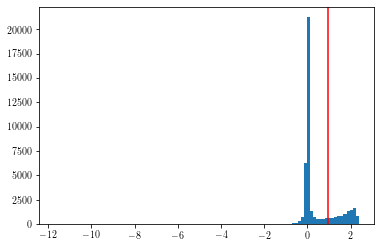

In [115]:
plt.hist(megno_post_data_list[3][-20], bins=100);
plt.axvline(megno_thresholds_list[3][-10], color="red", label="Threshold")
print(megno_scores_list[3][-10]["accuracy"])

In [100]:
len(megno_scores_list)

8

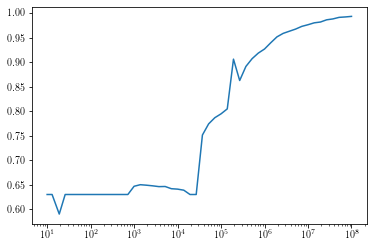

In [99]:
plt.plot(times, [s["accuracy"] for s in megno_scores_list[7]])
plt.xscale("log")

ValueError: supplied range of [-0.0412805756239004, inf] is not finite

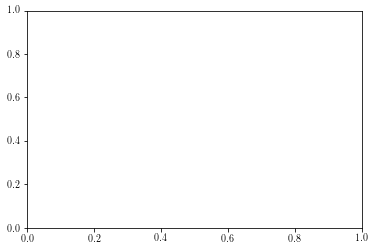

In [114]:
plt.hist(fli_post_data_list[-1][-20], bins=100);
plt.axvline(fli_thresholds_list[-1][-20], color="red", label="Threshold")

8


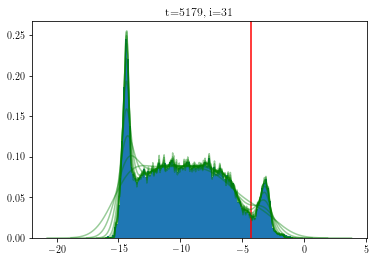

In [91]:

def find_threshold_smart_v2(data, haircut=0.002, starting_value=10):
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]

    ### data haircutting
    data = np.sort(data)
    data = data[int(haircut*len(data)):-int(haircut*len(data))]

    bandwidth_n_list = np.logspace(np.log10(starting_value), 3, 100)

    max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
    min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

    threshold_evolution = []
    lines_list = []

    for bandwidth_n in bandwidth_n_list:
        x_grid, density = FFTKDE(kernel="gaussian", bw=(max_val-min_val)/bandwidth_n).fit(data).evaluate()
        lines_list.append([x_grid, density])
        minima, maxima = (
            argrelextrema(density, np.less)[0],
            argrelextrema(density, np.greater)[0],
        )
        if len(maxima) <= 2:
            threshold_evolution.append(np.nan)
            continue
        
        idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
        idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

        maxima_1 = idx_maxima[0]
        maxima_2 = idx_maxima[1]
        maxima_3 = idx_maxima[2]
        sorted_x = sorted([maxima_1[0], maxima_2[0], maxima_3[0]])
        high_x = sorted_x[2]
        low_x = sorted_x[0]
        mid_x = sorted_x[1]

        filtered_minima = [(x_grid[i], density[i], n) for n, i in enumerate(minima) if x_grid[i] > mid_x and x_grid[i] < high_x]

        if len(filtered_minima) == 0:
            print("What the actual fuck?")
            threshold_evolution.append((high_x + low_x) / 2)
            continue
        
        min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
        threshold_evolution.append(min_minima[0])

    threshold_diff = np.abs(np.diff(threshold_evolution))
    max_diff = np.nanmax(threshold_diff)
    # find the first index where the difference is larger than 20% of the maximum difference
    idx = np.nanargmax(threshold_diff > 0.2 * max_diff)
    the_threshold = threshold_evolution[idx]
    the_profile = lines_list[idx]
    return (the_threshold, the_profile, threshold_evolution, lines_list)

print(len(fli_post_data_list))
for i in range(31, 32):
    plt.figure()
    data = fma_birkhoff_post_data_list[4][i]
    plt.title(f"t={times[-i]}, i={i}")
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]
    data_clone = data.copy()
    data_min = np.nanmin(data)
    # data_clone[data_clone <= data_min] = np.nan
    # find_threshold_smart(data_clone)
    plt.hist(data_clone, bins=100, density=True)
    the_threshold, the_profile, threshold_evolution, lines_list = find_threshold_smart_v2(data_clone)
    plt.axvline(the_threshold, color="red", label="Threshold")
    # plt.plot(the_profile[0], the_profile[1], color="green", label="Profile")
    for p in lines_list[::10]:
        plt.plot(p[0], p[1], color="green", alpha=0.4)
    # plt.axvline(gali_thresholds_list[3][-i], color="green", label="Threshold")

8


/tmp/ipykernel_11966/4193435747.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


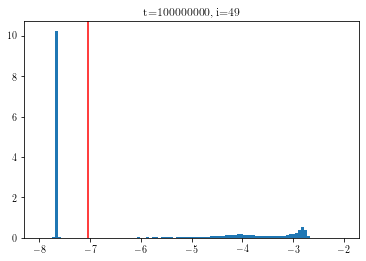

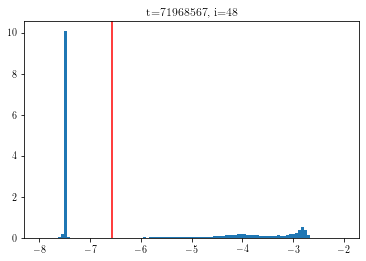

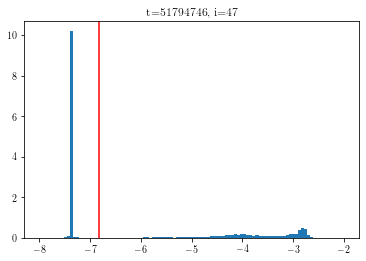

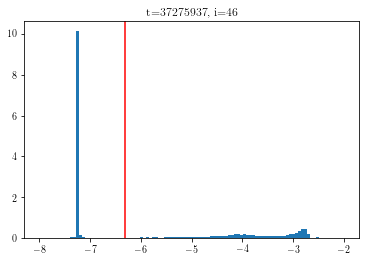

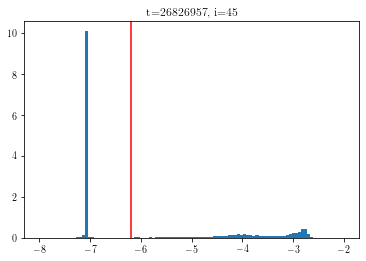

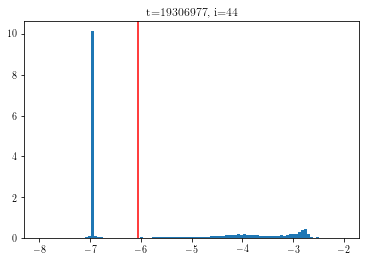

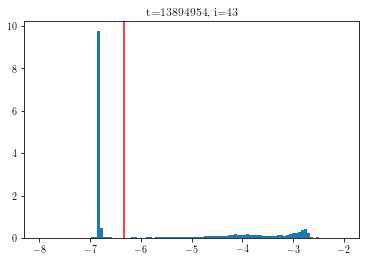

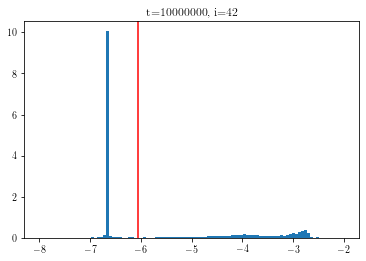

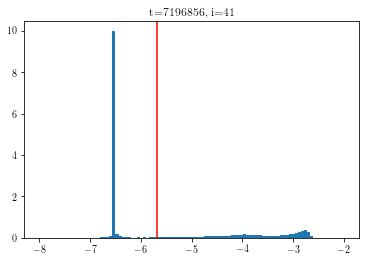

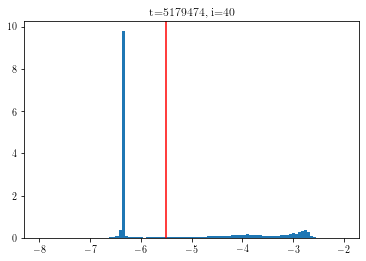

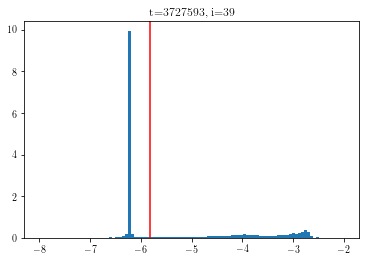

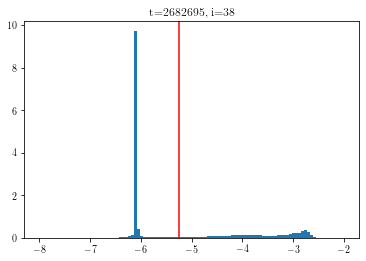

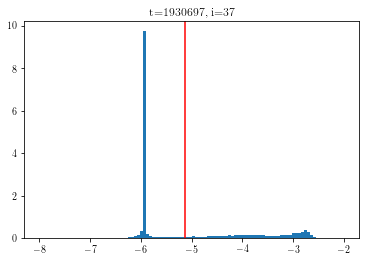

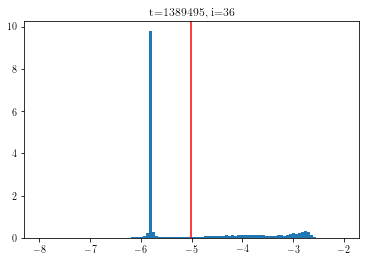

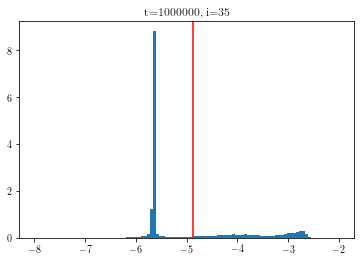

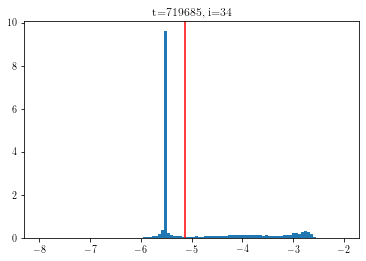

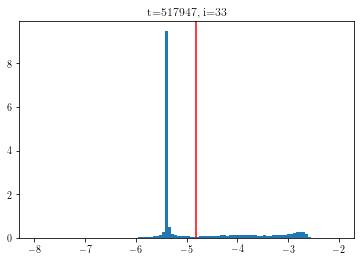

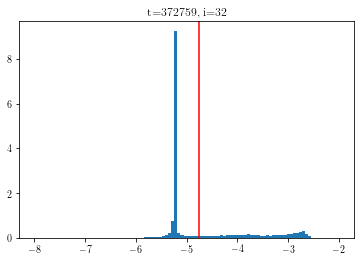

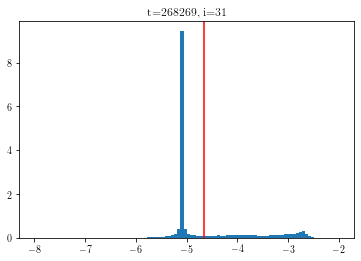

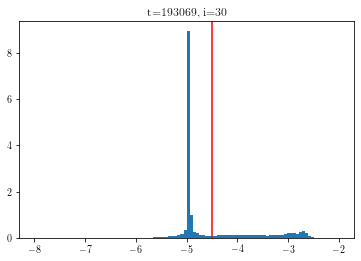

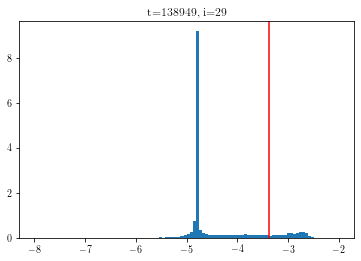

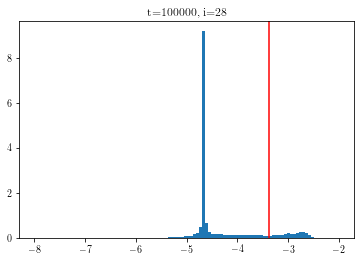

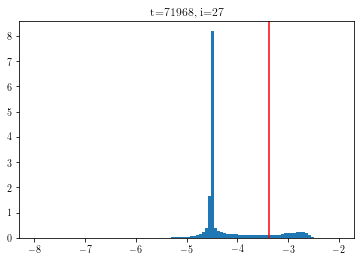

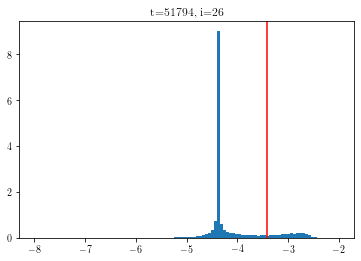

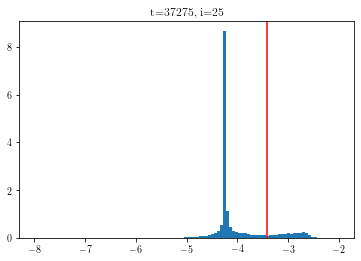

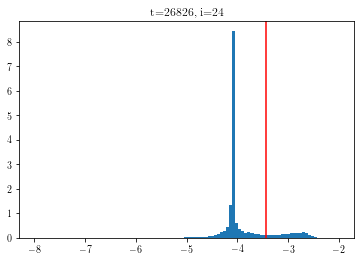

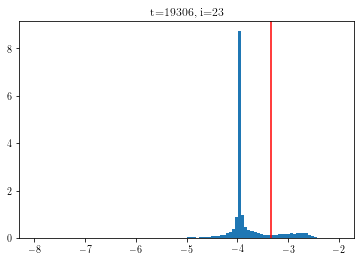

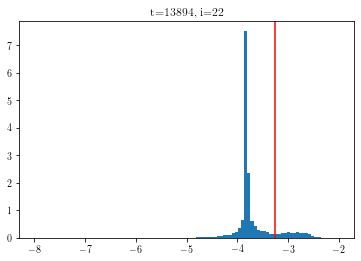

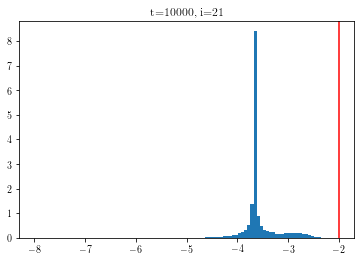

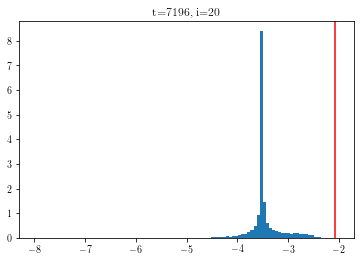

In [106]:

def find_threshold_smart_v2(data, haircut=0.002, starting_value=10):
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]

    ### data 0.002ting
    data = np.sort(data)
    data = data[int(0.002*len(data)):-int(0.002*len(data))]

    bandwidth_n_list = np.logspace(np.log10(starting_value), 3, 100)

    max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
    min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

    threshold_evolution = []
    lines_list = []

    for bandwidth_n in bandwidth_n_list:
        x_grid, density = FFTKDE(kernel="gaussian", bw=(max_val-min_val)/bandwidth_n).fit(data).evaluate()
        lines_list.append([x_grid, density])
        minima, maxima = (
            argrelextrema(density, np.less)[0],
            argrelextrema(density, np.greater)[0],
        )
        if len(maxima) <= 2:
            threshold_evolution.append(np.nan)
            continue
        
        idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
        idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

        maxima_1 = idx_maxima[0]
        maxima_2 = idx_maxima[1]
        maxima_3 = idx_maxima[2]
        sorted_x = sorted([maxima_1[0], maxima_2[0], maxima_3[0]])
        high_x = sorted_x[2]
        low_x = sorted_x[0]
        mid_x = sorted_x[1]

        filtered_minima = [(x_grid[i], density[i], n) for n, i in enumerate(minima) if x_grid[i] > mid_x and x_grid[i] < high_x]

        if len(filtered_minima) == 0:
            print("What the actual fuck?")
            threshold_evolution.append((high_x + low_x) / 2)
            continue
        
        min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
        threshold_evolution.append(min_minima[0])

    threshold_diff = np.abs(np.diff(threshold_evolution))
    max_diff = np.nanmax(threshold_diff)
    # find the first index where the difference is larger than 20% of the maximum difference
    idx = np.nanargmax(threshold_diff > 0.2 * max_diff)
    the_threshold = threshold_evolution[idx]
    the_profile = lines_list[idx]
    return (the_threshold, the_profile)

print(len(fli_post_data_list))
for i in range(1, 31):
    plt.figure()
    data = lyapunov_b_post_data_list[-1][-i]
    plt.title(f"t={times[-i]}, i={len(lyapunov_b_post_data_list[-1])-i}")
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]
    data_clone = data.copy()
     ### data 0.002ting
    data_clone = np.sort(data_clone)
    data_clone = data_clone[int(0.002 * len(data)) : -int(0.002 * len(data))]

    data_min = np.nanmin(data)
    # data_clone[data_clone <= data_min] = np.nan
    # find_threshold_smart(data_clone)
    plt.hist(data_clone, bins=100, density=True, range=(-8, -2))
    the_threshold = find_threshold_smart(data_clone)
    plt.axvline(the_threshold, color="red", label="Threshold")
    # plt.plot(the_profile[0], the_profile[1], color="green", label="Profile")
    # plt.axvline(gali_thresholds_list[3][-i], color="green", label="Threshold")

8


/tmp/ipykernel_11966/2170228272.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


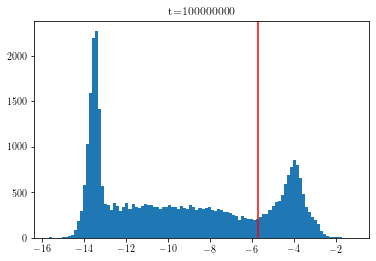

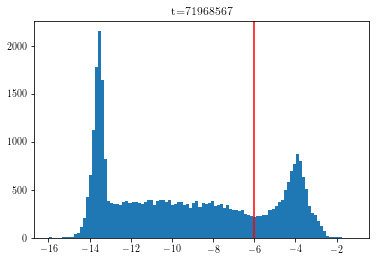

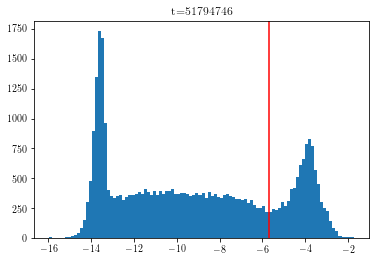

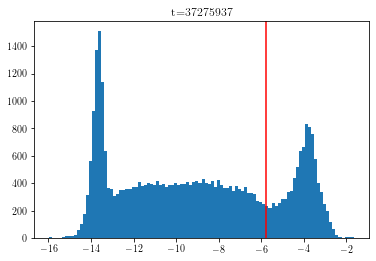

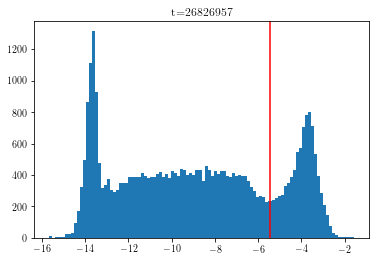

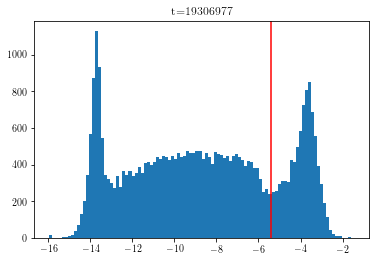

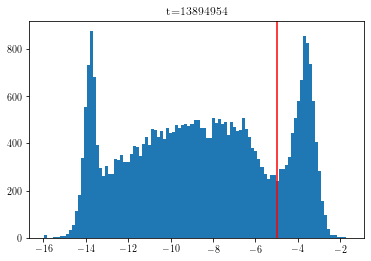

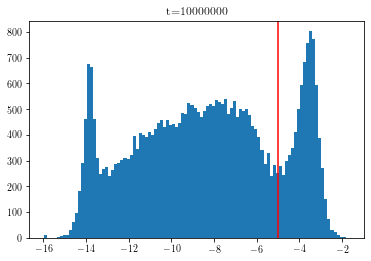

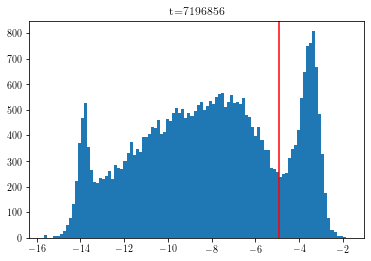

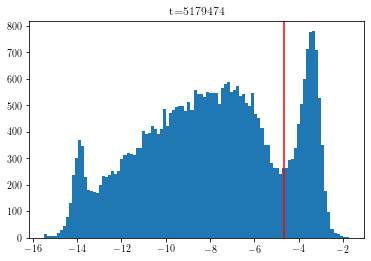

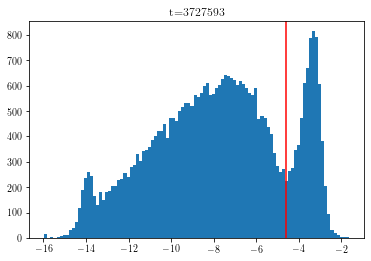

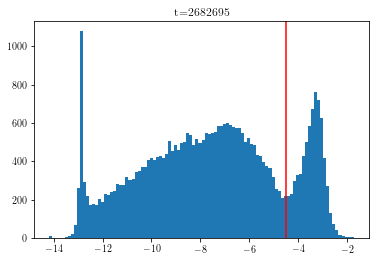

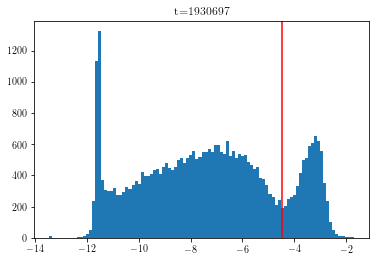

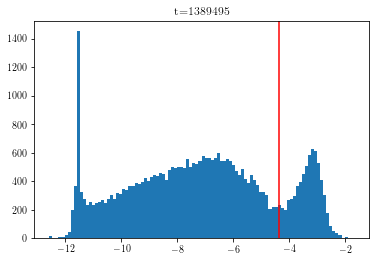

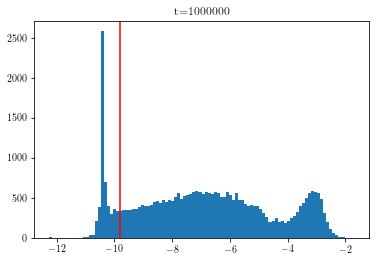

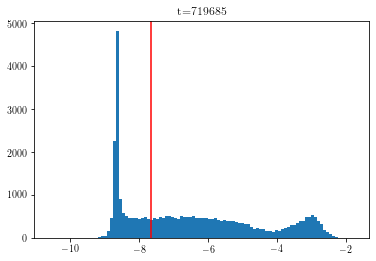

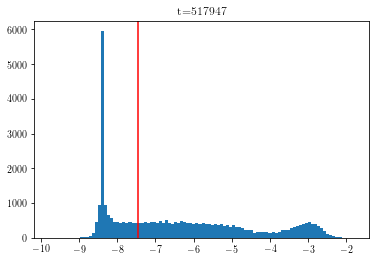

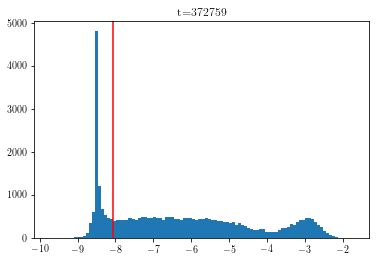

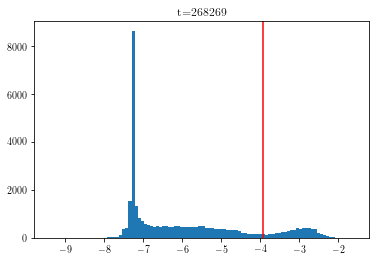

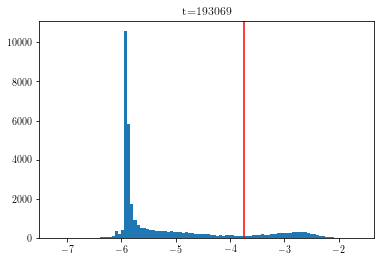

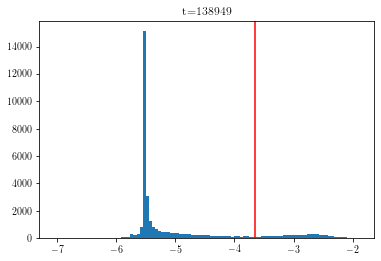

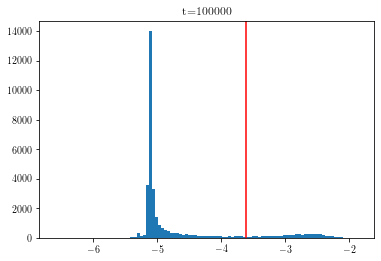

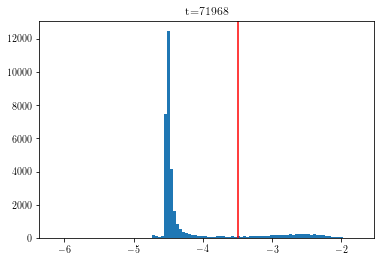

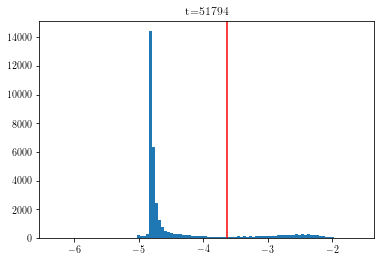

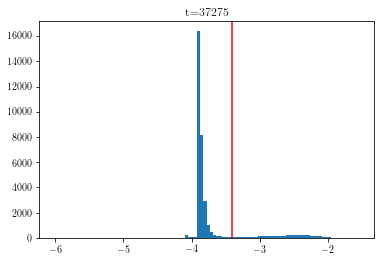

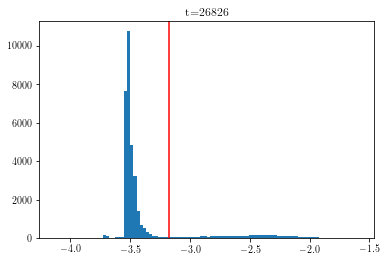

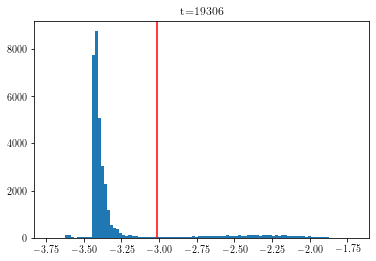

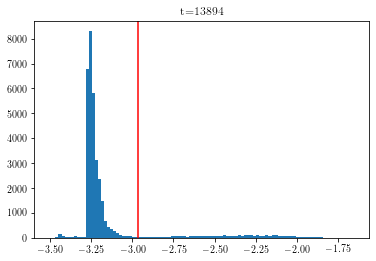

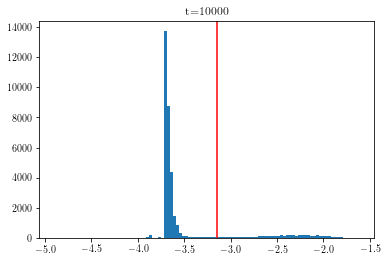

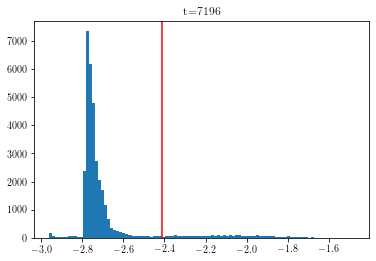

In [ ]:

def find_threshold_smart(data, haircut=0.002, starting_value=20):
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]

    ### data haircutting
    data = np.sort(data)
    data = data[int(haircut*len(data)):-int(haircut*len(data))]

    bandwidth_n_list = np.logspace(np.log10(starting_value), 3, 100)

    max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
    min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

    threshold_evolution = []
    # lines_list = []

    for bandwidth_n in bandwidth_n_list:
        x_grid, density = FFTKDE(kernel="gaussian", bw=(max_val-min_val)/bandwidth_n).fit(data).evaluate()
        # lines_list.append([x_grid, density])
        minima, maxima = (
            argrelextrema(density, np.less)[0],
            argrelextrema(density, np.greater)[0],
        )
        if len(maxima) <= 1:
            threshold_evolution.append(np.nan)
            continue
        
        idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
        idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

        maxima_1 = idx_maxima[0]
        maxima_2 = idx_maxima[1]
        high_x = np.max([maxima_1[0], maxima_2[0]])
        low_x = np.min([maxima_1[0], maxima_2[0]])

        filtered_minima = [(x_grid[i], density[i], n) for n, i in enumerate(minima) if x_grid[i] > low_x and x_grid[i] < high_x]

        if len(filtered_minima) == 0:
            print("What the actual fuck?")
            threshold_evolution.append((high_x + low_x) / 2)
            continue
        
        min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
        threshold_evolution.append(min_minima[0])

    threshold_diff = np.abs(np.diff(threshold_evolution))
    max_diff = np.nanmax(threshold_diff)
    # find the first index where the difference is larger than 20% of the maximum difference
    idx = np.nanargmax(threshold_diff > 0.2 * max_diff)
    the_threshold = threshold_evolution[idx]
    return the_threshold
print(len(fli_post_data_list))
for i in range(1, 31):
    plt.figure()
    data = fma_birkhoff_post_data_list[3][-i]
    plt.title(f"t={times[-i]}")
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]
    data_clone = data.copy()
    data_min = np.nanmin(data)
    # data_clone[data_clone <= data_min] = np.nan
    # find_threshold_smart(data_clone)
    plt.hist(data_clone, bins=100);
    plt.axvline(find_threshold_smart(data_clone), color="red", label="Threshold")
    # plt.axvline(gali_thresholds_list[3][-i], color="green", label="Threshold")

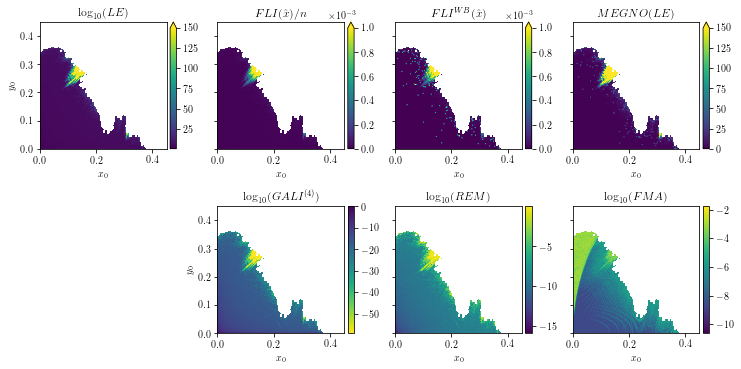

In [14]:
import types
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymax
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (-3, bottom + 17))

def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)    

fig = plt.figure(figsize=(12, 6.75))

gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[1, 3]))

axs.append(plt.subplot(gs[0, 3]))

sampling_time = 100000
t_idx = 35
t_fma_idx = -1

tmp_data = 10**lyapunov_post_data_list[3+0][t_idx]/2
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[0].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45), vmax=150)

axs[0].set_xlabel('$x_0$')
axs[0].set_ylabel('$y_0$')
# add side colorbar
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[0].set_title("$\\log_{{10}}(LE)$")

tmp_data = (10**lyapunov_nob_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[1].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45), vmax=100/sampling_time)

axs[1].set_xlabel('$x_0$')
# hide y axis
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')
cbar.formatter.set_powerlimits((0, 0))
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[1].set_title("$FLI(\\hat{x}) / n$")

tmp_data = (10**lyapunov_b_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[2].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45), vmax=100/sampling_time)

axs[2].set_xlabel('$x_0$')
# hide y axis
axs[2].set_yticklabels([])
axs[2].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[2].set_title("$FLI^{{WB}}(\\hat{x})$")

tmp_data = (gali_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[3].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis_r', extent=(0, 0.45, 0, 0.45))
cbar.formatter.set_powerlimits((0, 0))
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[3].set_xlabel('$x_0$')
axs[3].set_ylabel('$y_0$')
# add side colorbar
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[3].set_title("$\\log_{{10}}(GALI^{{(4)}})$")

tmp_data = (10**megno_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[6].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45), vmax=150)

axs[6].set_xlabel('$x_0$')
# hide y axis
axs[6].set_yticklabels([])
axs[6].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[6])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[6].set_title("$MEGNO(LE)$")

tmp_data = (rem_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[4].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45))

axs[4].set_xlabel('$x_0$')
# hide y axis
axs[4].set_yticklabels([])
axs[4].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[4].set_title("$\\log_{{10}}(REM)$")

tmp_data = (fma_birkhoff_post_data_list[3+0][t_idx])
tmp_data[~mask_list[3+0]] = np.nan
cmap = axs[5].imshow(tmp_data.reshape((samples, samples)), origin='lower', cmap='viridis', extent=(0, 0.45, 0, 0.45))

axs[5].set_xlabel('$x_0$')
# hide y axis
axs[5].set_yticklabels([])
axs[5].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[5].set_title("$\\log_{{10}}(FMA)$")

# increase distance between subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.01)

plt.savefig(os.path.join(FIGDIR, f"overview.{FORMAT}"), bbox_inches="tight", dpi=DPI)


/tmp/ipykernel_21604/3700000231.py:31: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_21604/3700000231.py:58: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_21604/3700000231.py:86: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_21604/3700000231.py:114: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_21604/3700000231.py:144: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_21604/3700000231.py:170: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-64.0 9.64327466553287e-17


/tmp/ipykernel_21604/3700000231.py:197: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


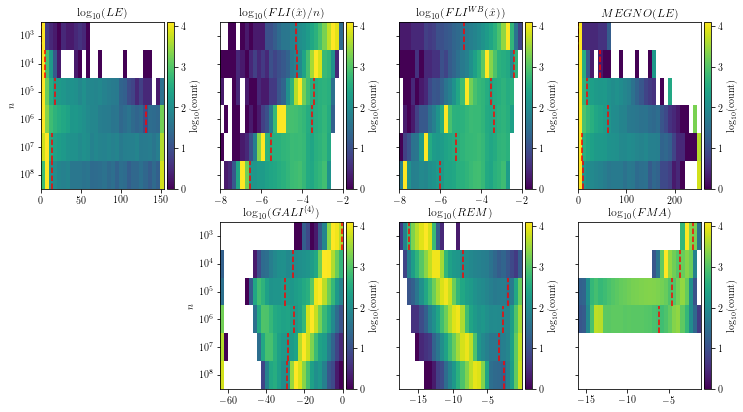

In [53]:
fig = plt.figure(figsize=(12, 6.75))

gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[1, 3]))

axs.append(plt.subplot(gs[0, 3]))

mask = mask_list[3]

sampling_time = 100000
t_idx = 35
t_fma_idx = -1
vmax = 4.1
vmin = 0.0

lyapunov_post_data = lyapunov_post_data_list[3]
lyapunov_thresholds = lyapunov_thresholds_list[3]

val_min, val_max = get_extents([10**l[mask]/2 for l in lyapunov_post_data[14::7]], 10)
val_min = 0
# print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([10**l[mask]/2 for l in lyapunov_post_data], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[0].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(lyapunov_thresholds[14::7]):
    axs[0].plot([10**t/2, 10**t/2], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[0].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[0].set_ylabel("$n$")
axs[0].set_title("$\\log_{{10}}(LE)$")

lyapunov_nob_post_data = lyapunov_nob_post_data_list[3]
lyapunov_nob_thresholds = lyapunov_nob_thresholds_list[3]

val_min, val_max = get_extents([l[mask] for l in (lyapunov_nob_post_data)[14::7]], 10)
# print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in (lyapunov_nob_post_data)], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[1].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(lyapunov_nob_thresholds[14::7]):
    axs[1].plot([t, t], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[1].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[1].set_title("$\\log_{{10}}(FLI(\\hat{x}) / n)$")

lyapunov_b_post_data = lyapunov_b_post_data_list[3]
lyapunov_b_thresholds = lyapunov_b_thresholds_list[3]

val_min, val_max = get_extents([l[mask] for l in (lyapunov_b_post_data)[14::7]], 10)
# print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in (lyapunov_b_post_data)], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[2].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(lyapunov_b_thresholds[14::7]):
    axs[2].plot([t, t], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[2].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[2].set_yticklabels([])
axs[2].set_ylabel('')
axs[2].set_title("$\\log_{{10}}(FLI^{{WB}}(\\hat{x}))$")

megno_post_data = megno_post_data_list[3]
megno_thresholds = megno_thresholds_list[3]

val_min, val_max = get_extents([10**l[mask] for l in megno_post_data[14::7]], 10)
# print(val_min, val_max)
# val_min = -8
# val_max = -2
tmp_data, bin_centers = compose_count_map([10**l[mask] for l in megno_post_data], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[6].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[6])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(megno_thresholds[14::7]):
    c = 10**t
    if c < 10.0:
        c *= 3
    axs[6].plot([c, c], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[6].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[6].set_yticklabels([])
axs[6].set_ylabel('')
axs[6].set_title("$MEGNO(LE)$")

gali_post_data = gali_post_data_list[3]
gali_thresholds = gali_thresholds_list[3]

val_min, val_max = get_extents([l[mask] for l in gali_post_data[14::7]], 10)
print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in gali_post_data], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[3].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(gali_thresholds[14::7]):
    axs[3].plot([t, t], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[3].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])
axs[3].set_ylabel("$n$")

axs[3].set_title("$\\log_{{10}}(GALI^{{(4)}})$")

rem_post_data = rem_post_data_list[3]
rem_thresholds = rem_thresholds_list[3]

val_min, val_max = get_extents([l[mask] for l in rem_post_data[14::7]], 10)
# print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in rem_post_data], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
# print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[4].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

# plot the thresholds over the imshow
for i, t in enumerate(rem_thresholds[14::7]):
    axs[4].plot([t, t], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[4].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[4].set_yticklabels([])
axs[4].set_ylabel('')
axs[4].set_title("$\\log_{{10}}(REM)$")

fma_birkhoff_post_data = fma_birkhoff_post_data_list[3]
fma_birkhoff_thresholds = fma_birkhoff_thresholds_list[3]

val_min, val_max = get_extents([l[mask] for l in fma_birkhoff_post_data[20::10]], 10)
# print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in fma_birkhoff_post_data], val_min, val_max, nbins=30, density=False)
tmp_data = np.log10(tmp_data)
tmp_data = tmp_data[20::10]
# print(tmp_data.shape)
# add two columns of nans to the bottom
tmp_data = np.concatenate((tmp_data, np.full((2, tmp_data.shape[1]), np.nan)), axis=0)
# print(tmp_data.shape)

cmap = axs[5].imshow(tmp_data, vmax=vmax, vmin=vmin, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], interpolation='none')

divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

for i, t in enumerate(fma_birkhoff_thresholds[20::10]):
    axs[5].plot([t, t], [(5-i)-0.5, (5-i)+0.5], '--', color='red')

axs[5].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[5].set_yticklabels([])
axs[5].set_ylabel('')
axs[5].set_title("$\\log_{{10}}(FMA)$")

# increase distance between subplots
plt.subplots_adjust(wspace=0.35)
# plt.subplots_adjust(hspace=0.01)

plt.savefig(os.path.join(FIGDIR, f"evolution.{FORMAT}"), bbox_inches="tight", dpi=DPI)

In [69]:
times_fma[-11]
times[28]

100000

In [93]:
def find_threshold_smart(data, haircut=0.002, starting_value=4, where_chaos="higher"):
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]

    ### data haircutting
    data = np.sort(data)
    data = data[int(haircut * len(data)) : -int(haircut * len(data))]

    bandwidth_n_list = np.logspace(np.log10(starting_value), 3, 100)

    max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
    min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

    if max_val == min_val:
        return max_val

    threshold_evolution = []
    lines_list = []
    object_list = []

    for bandwidth_n in bandwidth_n_list:
        x_grid, density = (
            FFTKDE(kernel="gaussian", bw=(max_val - min_val) / bandwidth_n)
            .fit(data)
            .evaluate()
        )
        lines_list.append([x_grid, density])
        minima, maxima = (
            argrelextrema(density, np.less)[0],
            argrelextrema(density, np.greater)[0],
        )
        if len(maxima) <= 1:
            threshold_evolution.append(np.nan)
            continue

        idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
        idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

        maxima_1 = idx_maxima[0]
        maxima_2 = idx_maxima[1]
        high_x = np.max([maxima_1[0], maxima_2[0]])
        low_x = np.min([maxima_1[0], maxima_2[0]])    

        filtered_minima = [
            (x_grid[i], density[i], n)
            for n, i in enumerate(minima)
            if x_grid[i] > low_x and x_grid[i] < high_x
        ]

        if len(filtered_minima) == 0:
            print("What the actual fuck?")
            threshold_evolution.append((high_x + low_x) / 2)
            continue

        min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
        threshold_evolution.append(min_minima[0])
        object_list.append([maxima_1, maxima_2, min_minima])

    threshold_diff = np.abs(np.diff(threshold_evolution))
    max_diff = np.nanmax(threshold_diff)
    # find the first index where the difference is larger than 20% of the maximum difference
    idx = np.nanargmax(threshold_diff > 0.2 * max_diff)
    the_threshold = threshold_evolution[idx]
    if where_chaos == "gali":
        the_threshold = np.max([the_threshold, -30])
    return the_threshold, idx, lines_list, object_list[idx]


def find_threshold_smart_v2(
    data, haircut=0.002, starting_value=4, where_chaos="higher"
):
    data = data[~np.isnan(data)]
    data = data[~np.isinf(data)]

    ### data haircutting
    data = np.sort(data)
    data = data[int(haircut * len(data)) : -int(haircut * len(data))]

    bandwidth_n_list = np.logspace(np.log10(starting_value), 3, 100)

    max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
    min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

    if max_val == min_val:
        return max_val

    threshold_evolution = []
    lines_list = []

    for bandwidth_n in bandwidth_n_list:
        x_grid, density = (
            FFTKDE(kernel="gaussian", bw=(max_val - min_val) / bandwidth_n)
            .fit(data)
            .evaluate()
        )
        lines_list.append([x_grid, density])
        minima, maxima = (
            argrelextrema(density, np.less)[0],
            argrelextrema(density, np.greater)[0],
        )
        if len(maxima) <= 2:
            threshold_evolution.append(np.nan)
            continue

        idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
        idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

        maxima_1 = idx_maxima[0]
        maxima_2 = idx_maxima[1]
        maxima_3 = idx_maxima[2]
        sorted_x = sorted([maxima_1[0], maxima_2[0], maxima_3[0]])
        high_x = sorted_x[2]
        low_x = sorted_x[0]
        mid_x = sorted_x[1]

        filtered_minima = [
            (x_grid[i], density[i], n)
            for n, i in enumerate(minima)
            if x_grid[i] > mid_x and x_grid[i] < high_x
        ]

        if len(filtered_minima) == 0:
            print("What the actual fuck?")
            threshold_evolution.append((high_x + low_x) / 2)
            continue

        min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
        threshold_evolution.append(min_minima[0])

    threshold_diff = np.abs(np.diff(threshold_evolution))
    max_diff = np.nanmax(threshold_diff)
    # find the first index where the difference is larger than 20% of the maximum difference
    idx = np.nanargmax(threshold_diff > 0.1 * max_diff)
    the_threshold = threshold_evolution[idx]
    return the_threshold, idx, lines_list

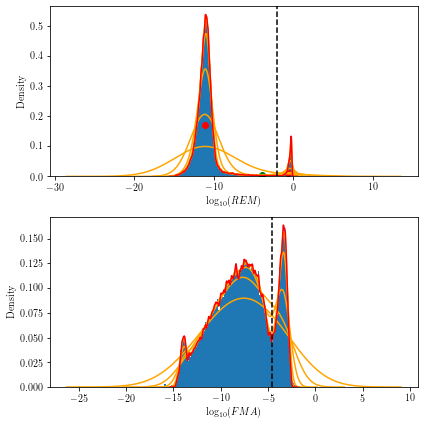

In [94]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

axs[0].hist(rem_post_data_list[3][28], density=True, bins=100)

threshold, idx, lines_list, object_list = find_threshold_smart(rem_post_data_list[3][28])

jump_idx = idx // 5

for i in range(0, idx, jump_idx):
    axs[0].plot(lines_list[i][0], lines_list[i][1], color="orange")
axs[0].plot(lines_list[idx][0], lines_list[idx][1], color="red")
axs[0].axvline(threshold, color="black", linestyle="--")

axs[0].set_xlabel("$\\log_{{10}}(REM)$")
axs[0].set_ylabel("Density")

axs[0].scatter(object_list[0][0], object_list[0][1], color="red")
axs[0].scatter(object_list[1][0], object_list[1][1], color="red")
axs[0].scatter(object_list[2][0], object_list[2][1], color="green")

axs[1].hist(fma_birkhoff_post_data_list[3][-11], density=True, bins=100)

threshold, idx, lines_list = find_threshold_smart_v2(fma_birkhoff_post_data_list[3][-11])

jump_idx = idx // 5

for i in range(0, idx, jump_idx):
    axs[1].plot(lines_list[i][0], lines_list[i][1], color="orange")
axs[1].plot(lines_list[idx][0], lines_list[idx][1], color="red")
axs[1].axvline(threshold, color="black", linestyle="--")

axs[1].set_xlabel("$\\log_{{10}}(FMA)$")
axs[1].set_ylabel("Density")

plt.tight_layout()


In [50]:
np.count_nonzero(np.isinf(gali_post_data_list[3][-1][masks_list[3]]))

6560

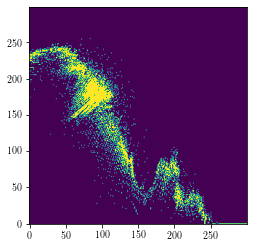

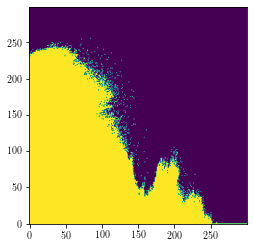

In [51]:
plt.figure()
plt.imshow(np.isinf(gali_post_data_list[3][-1]).reshape(300, 300), origin='lower')
plt.figure()
plt.imshow(masks_list[3].reshape(300, 300), origin='lower')

In [41]:
mask_list[3]

True

In [23]:
np.power(10,megno_thresholds[14::7])

array([3.13550965e-03, 4.59406263e+01, 1.87026158e+01, 6.19873561e+01,
       3.09970030e+00, 3.77919722e+00])

/tmp/ipykernel_11966/417187006.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


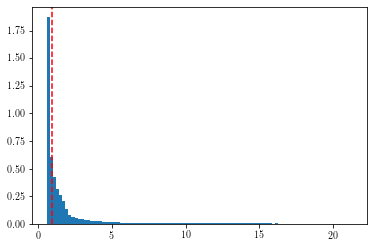

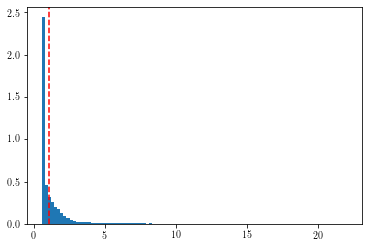

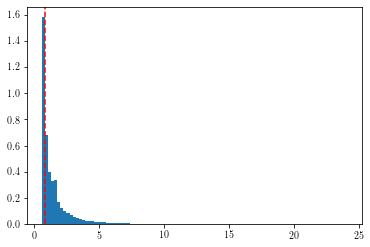

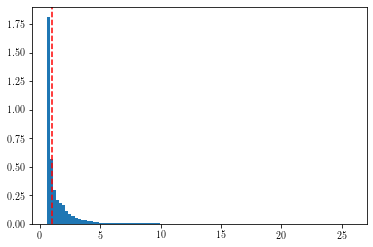

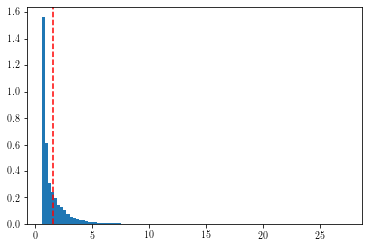

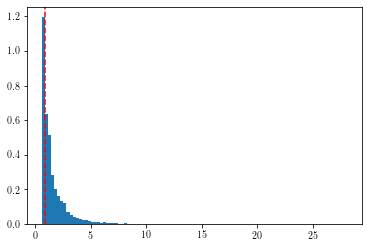

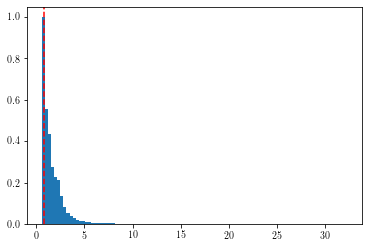

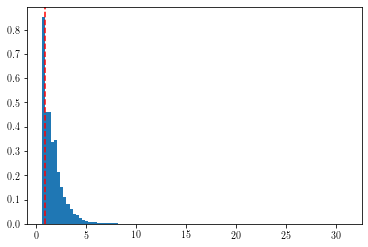

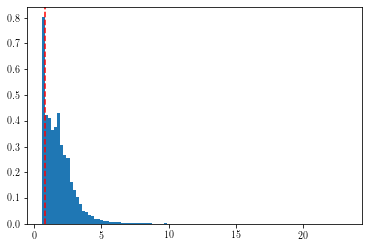

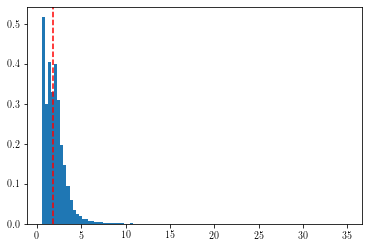

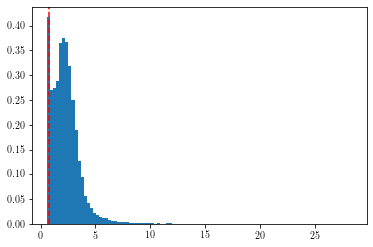

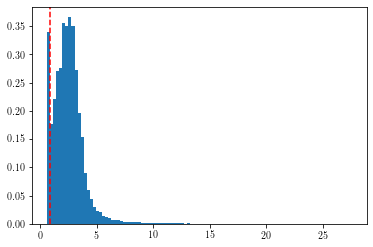

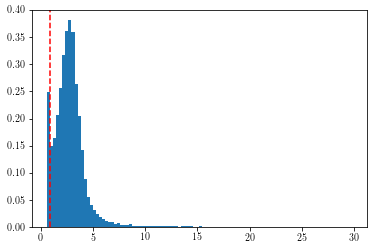

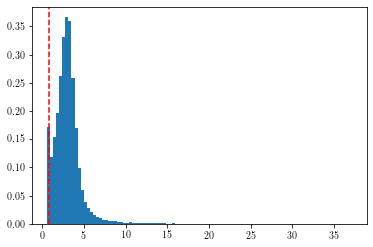

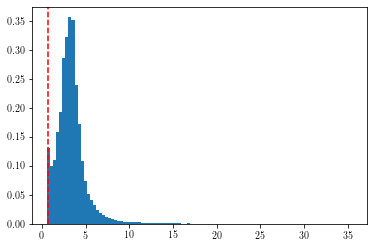

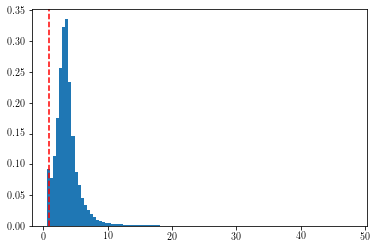

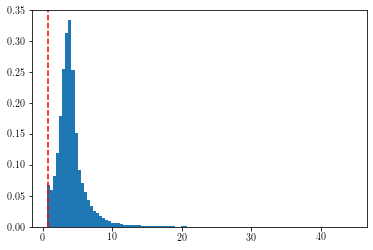

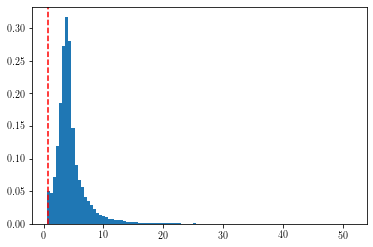

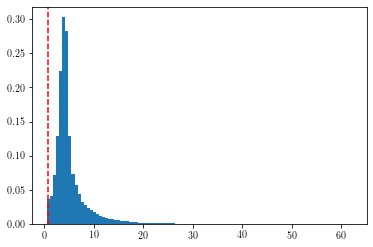

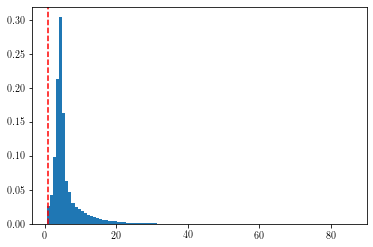

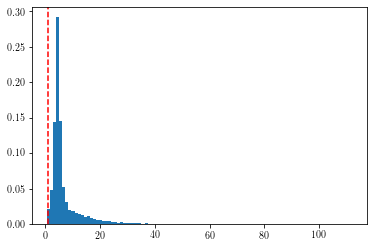

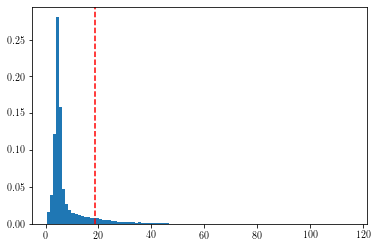

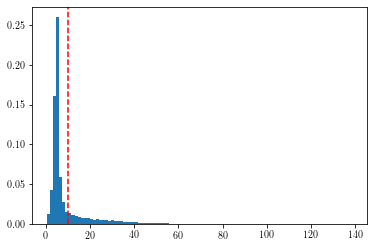

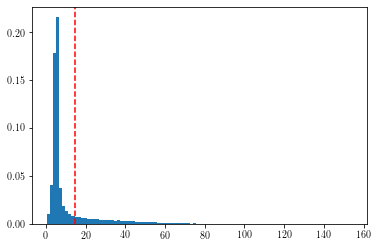

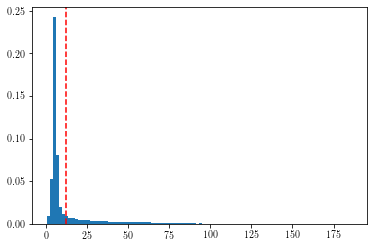

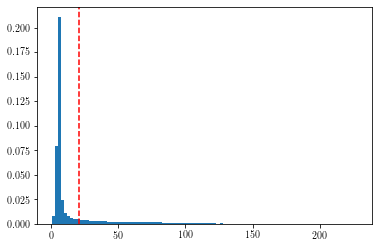

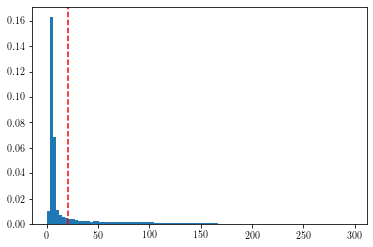

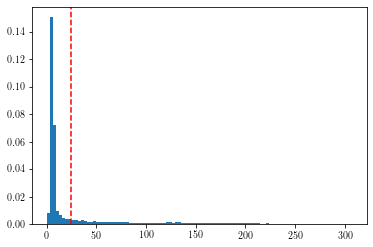

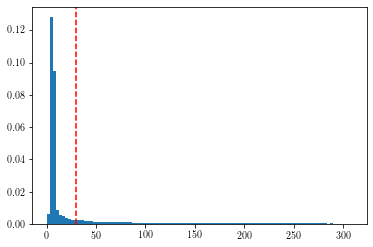

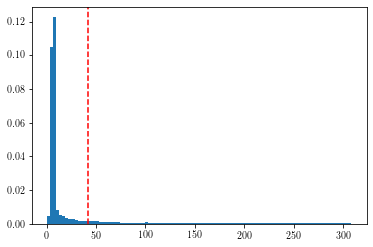

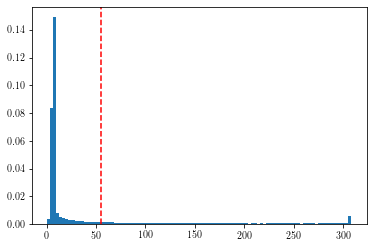

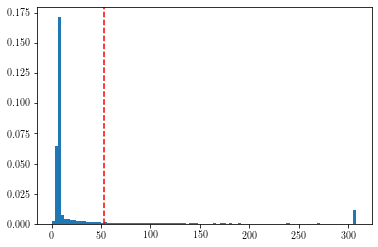

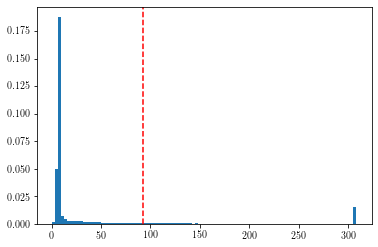

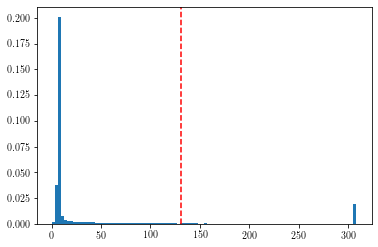

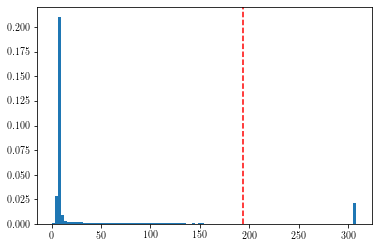

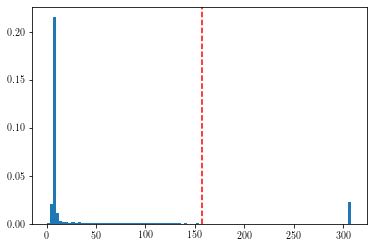

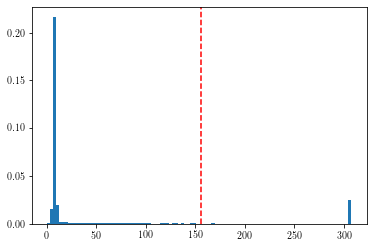

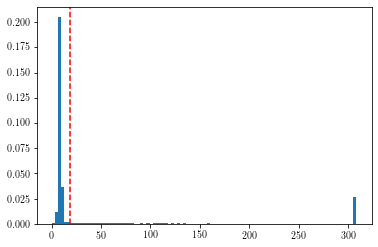

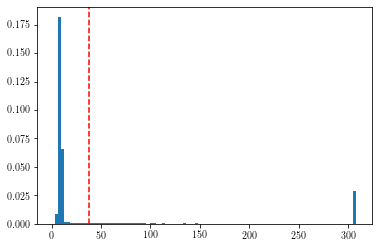

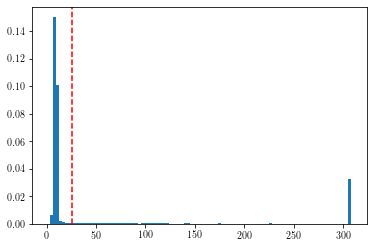

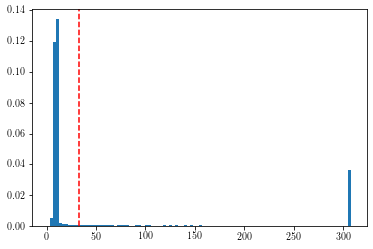

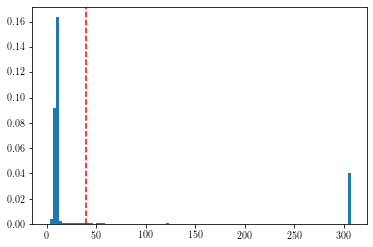

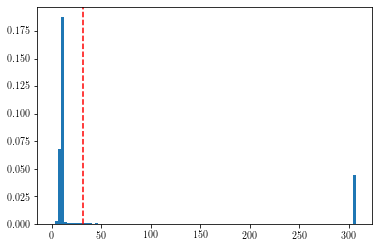

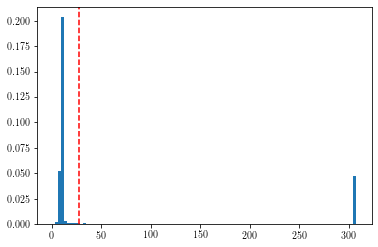

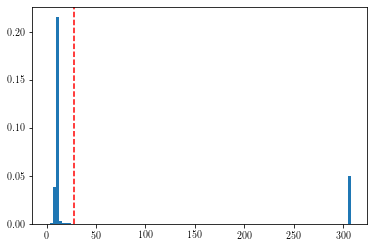

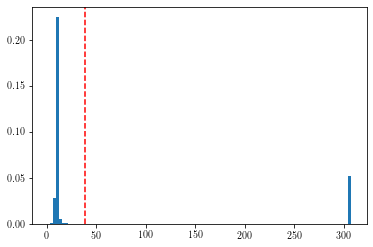

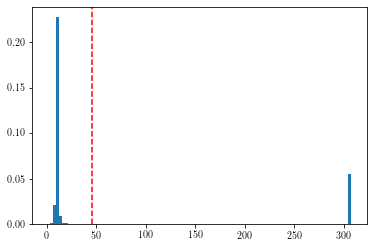

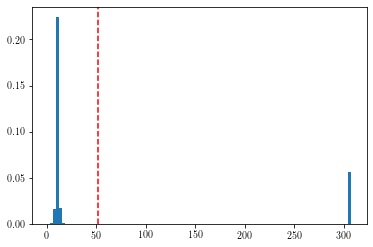

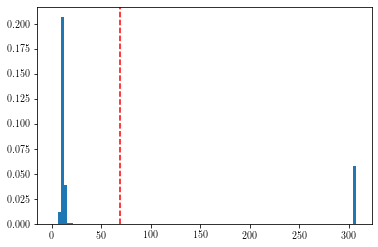

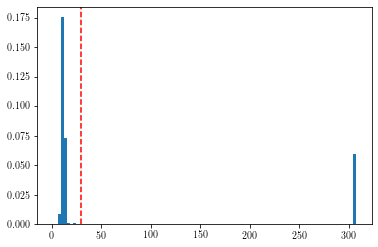

In [50]:
# lyapunov_post_data = lyapunov_post_data_list[2]
# lyapunov_thresholds = lyapunov_thresholds_list[2]

lyapunov_post_data = lyapunov_post_data_list[2]
lyapunov_thresholds = lyapunov_thresholds_list[2]

# for data, thresholds in zip(lyapunov_post_data, lyapunov_thresholds):
for data, thresholds in zip(lyapunov_post_data, lyapunov_thresholds):
    plt.figure()
    data[np.isinf(data)] = np.nan
    plt.hist(10**data, bins=100, density=True, label=f"$\\log_{{10}}(\\mathrm{{count}}) = {int(np.log10(len(data)))}$")
    plt.axvline(10**thresholds, color='red', linestyle='--')

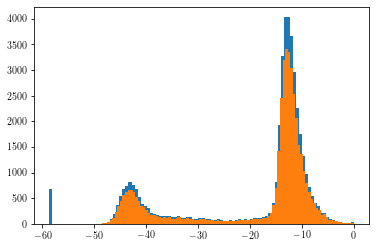

In [239]:
data = data[~np.isnan(data)]
data = data[~np.isinf(data)]
plt.hist(data, bins=100);

data_clone = data.copy()
data_min = np.nanmin(data)
data_clone[data_clone <= data_min] = np.nan

plt.hist(data_clone, bins=100);

0.6820162525026499
-3.311915926209183
86
-3.311915926209183


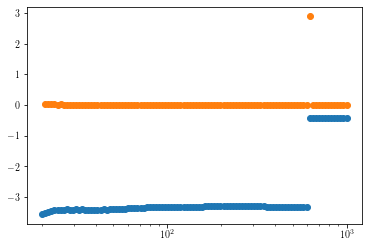

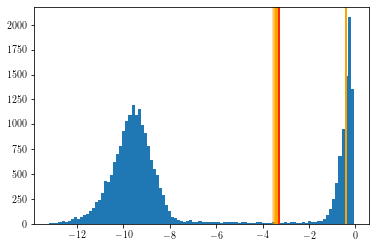

In [188]:
data = rem_post_data_list[-1][-15]
data = data[~np.isnan(data)]
data = data[~np.isinf(data)]
print(np.count_nonzero(data<-6)/len(data))

### data haircutting
# sort the data
data = np.sort(data)
# remove the first 0.2% and last 0.2% of the data
data = data[int(0.002*len(data)):-int(0.002*len(data))]

bandwidth_n_list = np.logspace(np.log10(20), 3, 100)

max_val = np.nanmax(data[~np.isnan(data) & ~np.isinf(data)])
min_val = np.nanmin(data[~np.isnan(data) & ~np.isinf(data)])

threshold_evolution = []
lines_list = []

for bandwidth_n in bandwidth_n_list:
    x_grid, density = FFTKDE(kernel="gaussian", bw=(max_val-min_val)/bandwidth_n).fit(data).evaluate()
    lines_list.append([x_grid, density])
    minima, maxima = (
        argrelextrema(density, np.less)[0],
        argrelextrema(density, np.greater)[0],
    )
    if len(maxima) <= 1:
        threshold_evolution.append(np.nan)
        continue
    
    idx_maxima = [(x_grid[i], density[i], n) for n, i in enumerate(maxima)]
    idx_maxima = sorted(idx_maxima, key=lambda x: x[1], reverse=True)

    maxima_1 = idx_maxima[0]
    maxima_2 = idx_maxima[1]
    high_x = np.max([maxima_1[0], maxima_2[0]])
    low_x = np.min([maxima_1[0], maxima_2[0]])

    filtered_minima = [(x_grid[i], density[i], n) for n, i in enumerate(minima) if x_grid[i] > low_x and x_grid[i] < high_x]

    if len(filtered_minima) == 0:
        threshold_evolution.append((high_x + low_x) / 2)
        continue
    
    min_minima = sorted(filtered_minima, key=lambda x: x[1])[0]
    threshold_evolution.append(min_minima[0])
    

threshold_diff = np.abs(np.diff(threshold_evolution))
max_diff = np.nanmax(threshold_diff)
# find the first index where the difference is larger than 20% of the maximum difference
idx = np.nanargmax(threshold_diff > 0.2 * max_diff)
the_threshold = threshold_evolution[idx]

plt.figure()
plt.scatter(bandwidth_n_list, threshold_evolution)
# plot diff
plt.scatter(bandwidth_n_list[1:], np.abs(np.diff(threshold_evolution)))
plt.xscale("log")

plt.figure()
plt.hist(data, bins=100)
for t in threshold_evolution:
    plt.axvline(t, color="orange", alpha=0.5)

plt.axvline(the_threshold, color="red", label="Threshold")
print(the_threshold)
print(idx)
print(the_threshold)
    

In [162]:
threshold_diff > 0.5 * max_diff

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

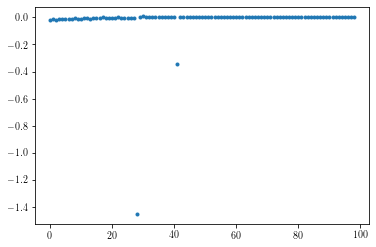

In [163]:
plt.plot(threshold_diff, ".")

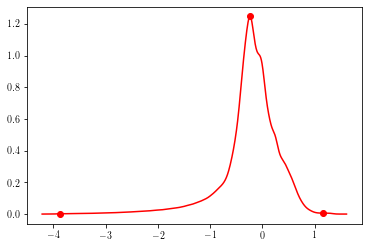

In [177]:
plt.plot(lines_list[idx+1][0], lines_list[idx+1][1], color="red")
minima, maxima = (
    argrelextrema(lines_list[idx+1][1], np.less)[0],
    argrelextrema(lines_list[idx+1][1], np.greater)[0],
)
plt.scatter(lines_list[idx+1][0][maxima], lines_list[idx+1][1][maxima], color="red")

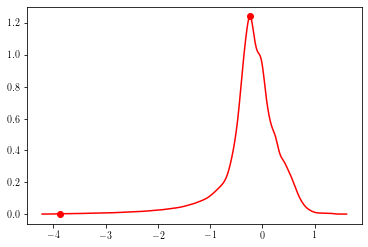

In [178]:
plt.plot(lines_list[idx][0], lines_list[idx][1], color="red")
minima, maxima = (
    argrelextrema(lines_list[idx][1], np.less)[0],
    argrelextrema(lines_list[idx][1], np.greater)[0],
)
plt.scatter(lines_list[idx][0][maxima], lines_list[idx][1][maxima], color="red")

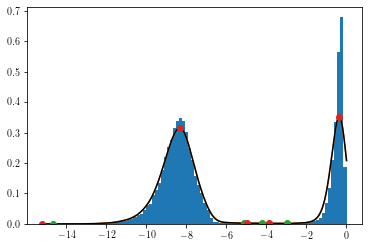

In [41]:
data = rem_post_data_list[-1][-10]
data = data[~np.isnan(data)]
data = data[~np.isinf(data)]
plt.hist(data, bins=100, density=True)

from sklearn.neighbors import KernelDensity

max_val = np.nanmax(data)
min_val = np.nanmin(data)

kde = KernelDensity(kernel='gaussian', bandwidth=(max_val-min_val)/50).fit(data.reshape(-1, 1))
s = np.linspace(min_val, max_val, 10000)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(e))
density = np.exp(e)
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
plt.plot(s, density, c='k')
plt.plot(s[mi], density[mi], 'o')
plt.plot(s[ma], density[ma], 'o')

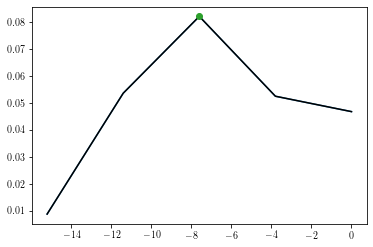

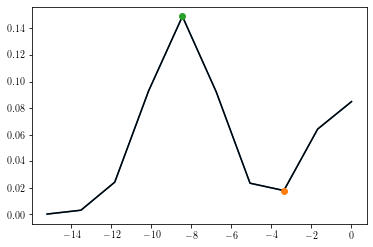

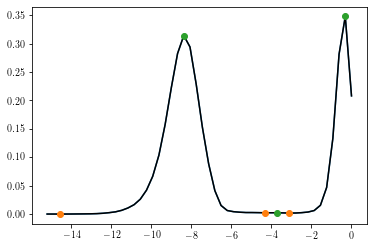

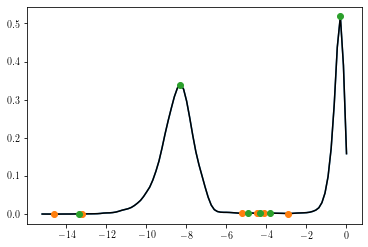

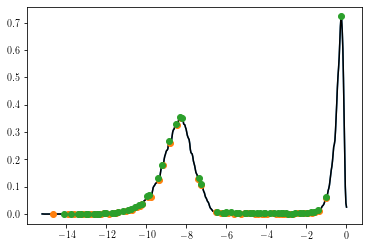

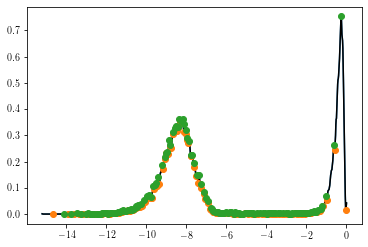

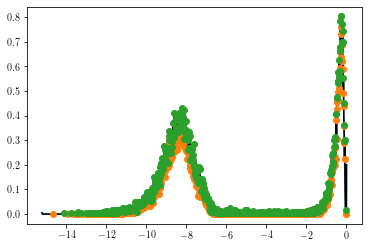

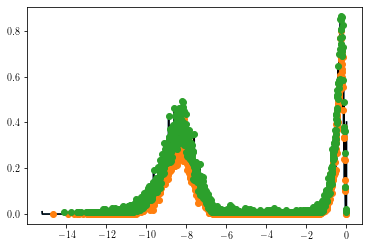

In [42]:
values_to_test = np.array([5, 10, 50, 100, 500, 1000, 5000, 10000])

for i, v in enumerate(values_to_test):
    plt.figure()
    max_val = np.nanmax(data)
    min_val = np.nanmin(data)
    kde = KernelDensity(kernel='gaussian', bandwidth=(max_val-min_val)/v).fit(data.reshape(-1, 1))
    s = np.linspace(min_val, max_val, v)
    e = kde.score_samples(s.reshape(-1,1))
    plt.plot(s, np.exp(e))
    density = np.exp(e)
    from scipy.signal import argrelextrema
    mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
    plt.plot(s, density, c='k')
    plt.plot(s[mi], density[mi], 'o')
    plt.plot(s[ma], density[ma], 'o')

0
0


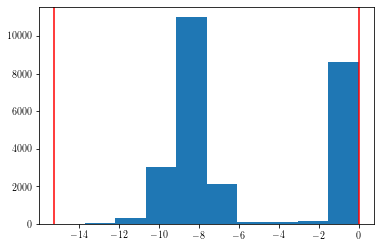

In [43]:
plt.hist(data)
print(np.count_nonzero(np.isnan(data)))
print(np.count_nonzero(np.isinf(data)))
plt.axvline(min_val,c="red")
plt.axvline(max_val,c="red")

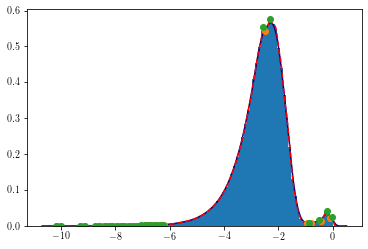

In [59]:
data = rem_post_data_list[0][-1]
data = data[~np.isnan(data)]
data = data[~np.isinf(data)]
plt.hist(data, bins=100, density=True)
x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman', c="navy")
y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
plt.plot(x, y, label='KDE /w ISJ', c="red", ls="--")

from scipy.signal import argrelextrema
mi, ma = argrelextrema(y, np.less)[0], argrelextrema(y, np.greater)[0]
plt.plot(x[mi], y[mi], 'o')
plt.plot(x[ma], y[ma], 'o')

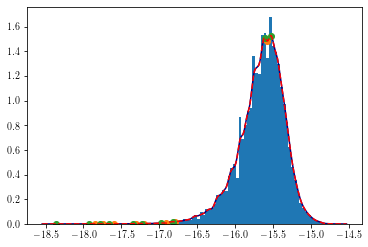

In [64]:
data = rem_post_data_list[0][0]
data = data[~np.isnan(data)]
data = data[~np.isinf(data)]
plt.hist(data, bins=100, density=True)
x, y = FFTKDE(kernel='gaussian', bw='scott').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman', c="navy")
mi, ma = argrelextrema(y, np.less)[0], argrelextrema(y, np.greater)[0]
plt.plot(x[mi], y[mi], 'o')
plt.plot(x[ma], y[ma], 'o')
y = FFTKDE(kernel='gaussian', bw='scott').fit(data).evaluate(x)
plt.plot(x, y, label='KDE /w ISJ', c="red", ls="--")



In [38]:
print(x)
print(min_val)
print(max_val)

[-14.33836607 -14.32256238 -14.30675869 ...   1.79720143   1.81300512
   1.82880881]
-12.495475674967143
-0.014081586109622738


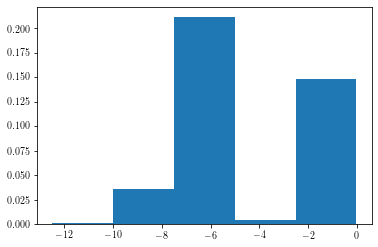

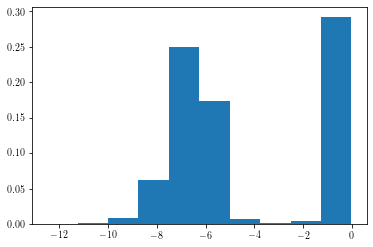

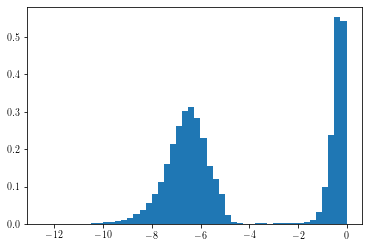

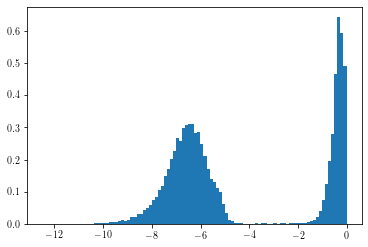

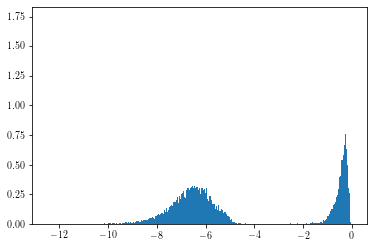

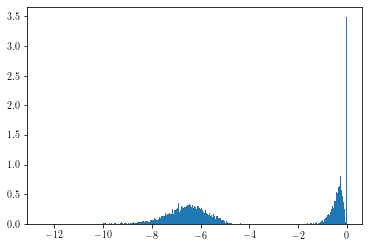

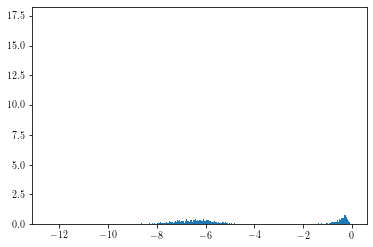

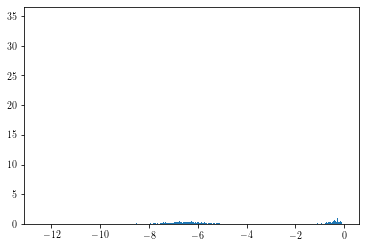

In [48]:
values_to_test = np.array([5, 10, 50, 100, 500, 1000, 5000, 10000])

for i, v in enumerate(values_to_test):
    plt.figure()
    plt.hist(data, bins=v, density=True)

In [64]:
TUNES = ["scan_28_31_", "scan_168_201_"]
TUNES_NAMES = ["(0.28, 0.31)", "(0.168, 0.201)"]
EXTENTS = [(0, 0.45, 0, 0.45), (0, 0.6, 0, 0.6)]
EPSILONS = ["epsilon_0d0_", "epsilon_32d0_"]
EPSILONS_NAMES = ["0.0", "32.0"]
MUS = ["mu_0d0_", "mu_0d5_"]
MUS_NAMES = ["0.0", "0.5"]

SAMPLES_PER_SIDE = [300]

# create a list of all the products of the above lists
# this will be used to loop over all the different files
# and load the data
all_combinations = list(
    itertools.product(((t, s) for t, s in zip(TUNES, EXTENTS)), EPSILONS, MUS)
)
all_combinations = list(itertools.product(TUNES, EPSILONS, MUS))

print(all_combinations)

[('scan_28_31_', 'epsilon_0d0_', 'mu_0d0_'), ('scan_28_31_', 'epsilon_0d0_', 'mu_0d5_'), ('scan_28_31_', 'epsilon_32d0_', 'mu_0d0_'), ('scan_28_31_', 'epsilon_32d0_', 'mu_0d5_'), ('scan_168_201_', 'epsilon_0d0_', 'mu_0d0_'), ('scan_168_201_', 'epsilon_0d0_', 'mu_0d5_'), ('scan_168_201_', 'epsilon_32d0_', 'mu_0d0_'), ('scan_168_201_', 'epsilon_32d0_', 'mu_0d5_')]
